Setup and loading data

In [1]:
!pip install pmdarima

In [2]:
!pip install autots

In [3]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd          # pandas is an important library for data analysis as it allows us to use data frames; you can think of data frame
                             # as a table (hence, composed of rows and columns); 
                             # for more on pandas, see https://pandas.pydata.org/docs/getting_started/index.html#getting-started
#import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")
                             

Setup Complete


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import statsmodels.api as sm
import altair as alt
from altair import datum
import numpy as np

In [6]:
# Configuring plotting visual and sizes
# sns.set_style("whitegrid")
# sns.set_context("talk")
# params = {
#     "legend.fontsize": "x-large",
#     "figure.figsize": (30, 10),
#     "axes.labelsize": "x-large",
#     "axes.titlesize": "x-large",
#     "xtick.labelsize": "x-large",
#     "ytick.labelsize": "x-large",
# }
# plt.rcParams.update(params)

UPLOAD EXCEL PROVIDED DATASET AFTER CSV CONVERSION

In [7]:
pcu_filepath = "7B15E011.csv"

# Read the file into a data frame called iris_data (think of data frames a kind of table or like an Excel spreadsheet)
pcu_data = pd.read_csv(pcu_filepath) # note the index column in the file is labelled "Id",
                                                       # which is why we are using that label as the second argument

What does the data look like?


In [8]:
pcu_data.head() # top five records of the file

SurgDate  DOW  T - 28  T - 21  T - 14  ...  T - 4  T - 3  T - 2  T - 1  Actual
0  10/10/2011  Mon      38      45      60  ...     94     98    100    104     106
1  10/11/2011  Tue      35      47      65  ...     99     99     99    114     121
2  10/12/2011  Wed      26      43      54  ...    102    102    106    114     126
3  10/13/2011  Thu      28      48      65  ...     94     97     98    103     114
4  10/14/2011  Fri      31      40      50  ...     78     83     87     94     106

[5 rows x 19 columns]

In [9]:
pcu_data.tail()

SurgDate  DOW  T - 28  T - 21  T - 14  ...  T - 4  T - 3  T - 2  T - 1  Actual
236  9/10/2012  Mon      33      49      68  ...    101    103    109    110     118
237  9/11/2012  Tue      31      56      68  ...     97     98     98     99     108
238  9/12/2012  Wed      39      49      69  ...     99    100    104    115     121
239  9/13/2012  Thu      34      51      68  ...     99     97    101    106     114
240  9/14/2012  Fri      27      41      63  ...     78     81     86    101     102

[5 rows x 19 columns]

In [10]:
pcu_data.columns

Index(['SurgDate', 'DOW', 'T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12',
       'T - 11', 'T - 10', 'T - 9', 'T - 8', 'T - 7', 'T - 6', 'T - 5',
       'T - 4', 'T - 3', 'T - 2', 'T - 1', 'Actual'],
      dtype='object')

In [11]:
pcu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SurgDate  241 non-null    object
 1   DOW       241 non-null    object
 2   T - 28    241 non-null    int64 
 3   T - 21    241 non-null    int64 
 4   T - 14    241 non-null    int64 
 5   T - 13    241 non-null    int64 
 6   T - 12    241 non-null    int64 
 7   T - 11    241 non-null    int64 
 8   T - 10    241 non-null    int64 
 9   T - 9     241 non-null    int64 
 10  T - 8     241 non-null    int64 
 11  T - 7     241 non-null    int64 
 12  T - 6     241 non-null    int64 
 13  T - 5     241 non-null    int64 
 14  T - 4     241 non-null    int64 
 15  T - 3     241 non-null    int64 
 16  T - 2     241 non-null    int64 
 17  T - 1     241 non-null    int64 
 18  Actual    241 non-null    int64 
dtypes: int64(17), object(2)
memory usage: 35.9+ KB


In [12]:
pcu_data.describe()

T - 28      T - 21      T - 14  ...       T - 2       T - 1      Actual
count  241.000000  241.000000  241.000000  ...  241.000000  241.000000  241.000000
mean    34.261411   47.240664   64.439834  ...  101.165975  110.008299  116.381743
std      9.387610   11.321079   13.495891  ...   17.547004   17.785057   17.629388
min      0.000000    0.000000    0.000000  ...    0.000000    3.000000   11.000000
25%     28.000000   41.000000   58.000000  ...   95.000000  102.000000  110.000000
50%     35.000000   48.000000   65.000000  ...  103.000000  112.000000  117.000000
75%     40.000000   55.000000   73.000000  ...  111.000000  119.000000  126.000000
max     57.000000   73.000000   93.000000  ...  131.000000  139.000000  145.000000

[8 rows x 17 columns]

CREATE A WORDCLOUD OF DOCUMENT INFORMATION TO HIGHLIGHT IMPORTANT KEY WORDS

Extract Text

In [13]:
!pip install pdfminer

In [14]:
#importing packages
import pdfminer
import io
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage

#defining function 
#reference: http://www.blog.pythonlibrary.org/2018/05/03/exporting-data-from-pdfs-with-python/
def extract_text_from_pdf(pdf_path):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)
    with open(pdf_path, 'rb') as fh:
        for page in PDFPage.get_pages(fh, 
                                      caching=True,
                                      check_extractable=False):
            page_interpreter.process_page(page)
        text = fake_file_handle.getvalue()
    # close open handles
    converter.close()
    fake_file_handle.close()
    if text:
        return text

#executing function and printing text
text = extract_text_from_pdf(r'9B15E011_pcu.pdf')
print(text)

  9B15E011   VANDERBILT UNIVERSITY MEDICAL CENTER: ELECTIVE SURGERY SCHEDULE   Lauren E. Cipriano, Vikram Tiwari, Warren S. Sandberg, and Gregory S. Zaric wrote this case solely to provide material for class discussion. The authors do not intend to illustrate either effective or ineffective handling of a managerial situation. The authors may have disguised certain names and other identifying information to protect confidentiality.  This publication may not be transmitted, photocopied, digitized or otherwise reproduced in any form or by any means without the permission of the copyright holder. Reproduction of this material is not covered under authorization by any reproduction rights organization. To order copies or request permission to reproduce materials, contact Ivey Publishing, Ivey Business School, Western University, London, Ontario, Canada, N6G 0N1; (t) 519.661.3208; (e) cases@ivey.ca; www.iveycases.com.  Copyright © 2015, Richard Ivey School of Business Foundation Version: 2015

Text Preprocessing

In [15]:
#importing packeges for cleaning
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download("stopwords")

#--------------------------------------------------------------------------------------

#removing numbers
def remove_num(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text

#executing function
text = np.vectorize(remove_num)(text)

#--------------------------------------------------------------------------------------
#removing punctuation
from string import punctuation
def remove_punct(text):
    text = ' '.join(word.strip(punctuation) for word in text.split() if word.strip(punctuation))
    return text

#executing function
text = np.vectorize(remove_punct)(text)

#--------------------------------------------------------------------------------------

#removing other characters
def remove_u(text):
    text = text.replace('_','')
    text = text.replace('?','')
    text = text.replace('•','')
    text = text.replace("@",'')
    text = text.replace('▯','')
    text = text.replace("'",'')
    text = text.replace(",","")
    return text

#executing function
text = np.vectorize(remove_u)(text)

#--------------------------------------------------------------------------------------

#removing extra spaces
def remove_extra_space(text):
    word_list = text.split()
    text = ' '.join(word_list)
    return text

#executing function
text = np.vectorize(remove_extra_space)(text)

#--------------------------------------------------------------------------------------

#removing very common words
#reference: https://gist.github.com/sebleier/554280

stop_words = stopwords.words('english') + ["publishcaseivey","ivey","business", "school","authorization", "reproduction", "rights", "organization", "copies","publishing","authorized","youssef","badawy","indu6611", "applied","industrial","analytics","concordia","university","outside","parameters","copyright","violation","i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the","Mr", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

#executing function
# text = np.vectorize(remove_stopwords)(text)
text = np.char.lower(text)
text = text.tolist()

tokenizer = RegexpTokenizer(r'\w+')
tokenized_sent = tokenizer.tokenize(text)
tokenized_sent

words = tokenized_sent
processed_text = [word for word in words if word not in stop_words]
words = (" ").join(processed_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Wordcloud

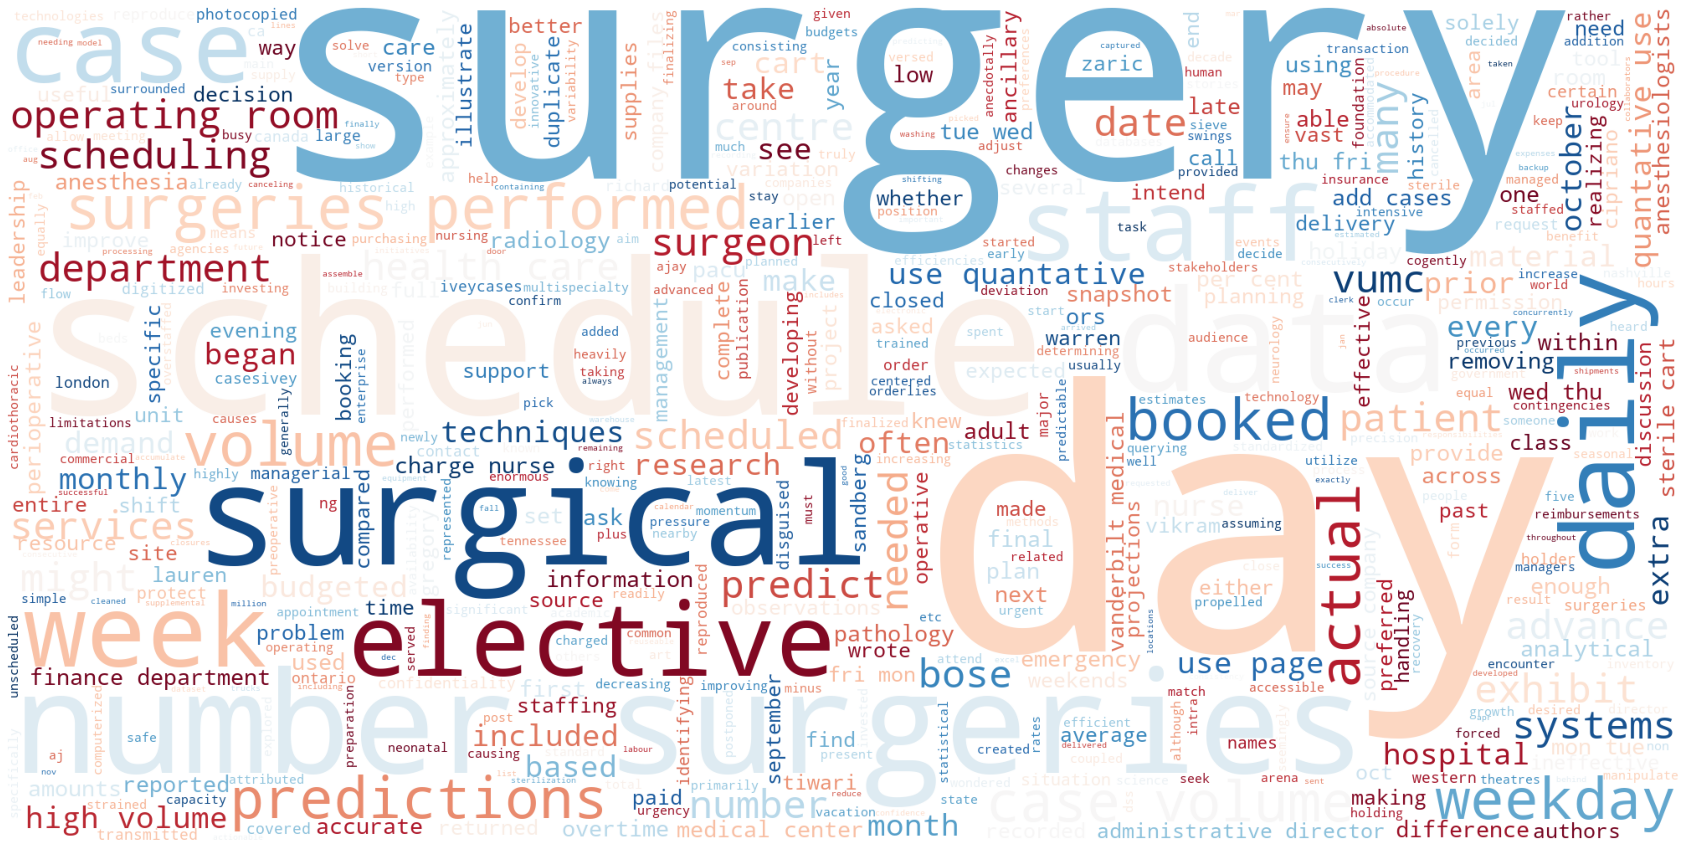

In [16]:
#importing packages
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

#--------------------------------------------------------------------------------------


# lower max_font_size, change the maximum number of word and lighten the background:
from wordcloud import ImageColorGenerator

#--------------------------------------------------------------------------------------

#creating wordcloud
# wordcloud = WordCloud(mask=mask, width=2000, height=1000, colormap="RdBu_r",contour_color="#5d0f24", max_words=10000,relative_scaling = 0, background_color = "white").generate(words)
wordcloud = WordCloud(width=2000, height=1000, colormap="RdBu_r",contour_color="#5d0f24", max_words=10000,relative_scaling = 0, background_color = "white").generate(words)
# image_colors = ImageColorGenerator(mask)
# plt.figure(figsize=[20,15])
# plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
# plt.axis("off")
# _=plt.show()

plt.figure(figsize=(30,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
# plt.savefig('WordCloud-Case2.png', format='png', dpi=1200)
# plt.close()

# Analysis of Data

In [17]:
pcu_data.head()

SurgDate  DOW  T - 28  T - 21  T - 14  ...  T - 4  T - 3  T - 2  T - 1  Actual
0  10/10/2011  Mon      38      45      60  ...     94     98    100    104     106
1  10/11/2011  Tue      35      47      65  ...     99     99     99    114     121
2  10/12/2011  Wed      26      43      54  ...    102    102    106    114     126
3  10/13/2011  Thu      28      48      65  ...     94     97     98    103     114
4  10/14/2011  Fri      31      40      50  ...     78     83     87     94     106

[5 rows x 19 columns]

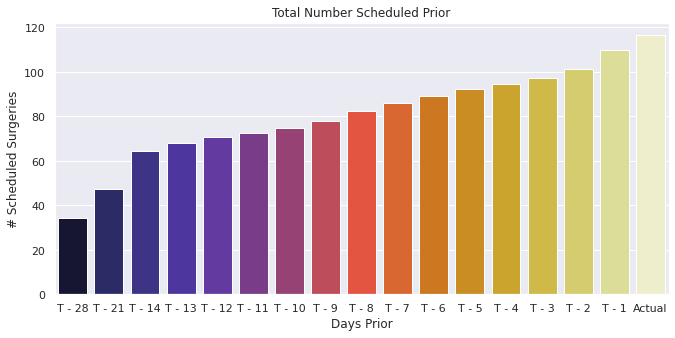

In [18]:
sns.set(font_scale=1)
plt.figure(figsize=(11,5))
sns.barplot(data=pcu_data,palette="CMRmap", ci=None)
plt.xlabel('Days Prior')
plt.ylabel('# Scheduled Surgeries')
plt.title('Total Number Scheduled Prior')
plt.show()
# plt.savefig('days_prior_demand.svg', format='svg', dpi=1200)
# plt.close()

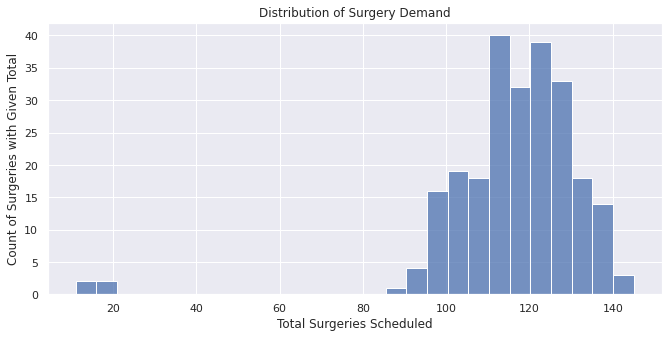

In [19]:
sns.set(font_scale=1)
plt.figure(figsize=(11,5))
sns.histplot(pcu_data["Actual"])
plt.xlabel('Total Surgeries Scheduled')
plt.ylabel('Count of Surgeries with Given Total')
plt.title('Distribution of Surgery Demand')
plt.show()
# plt.savefig('Demand_distribution.svg', format='svg', dpi=1200)
# plt.close()

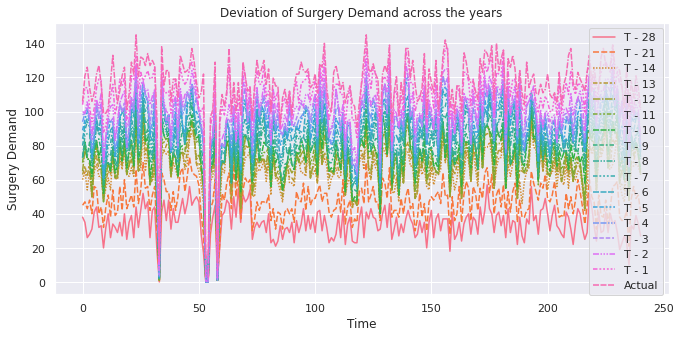

In [20]:
sns.set(font_scale=1)
plt.figure(figsize=(11,5))
sns.lineplot(data=pcu_data)
plt.xlabel('Time')
plt.ylabel('Surgery Demand')
plt.title('Deviation of Surgery Demand across the years')
plt.show()
# plt.savefig('Deviation_demand_week.svg', format='svg', dpi=1200)
# plt.close()

In [21]:
pcu_data.groupby('DOW')['Actual'].std()
pcu_data["DOW"].value_counts()

Fri    49
Tue    49
Thu    48
Wed    48
Mon    47
Name: DOW, dtype: int64

In [22]:
pcu_data.groupby('DOW')['Actual'].mean().index

Index(['Fri', 'Mon', 'Thu', 'Tue', 'Wed'], dtype='object', name='DOW')

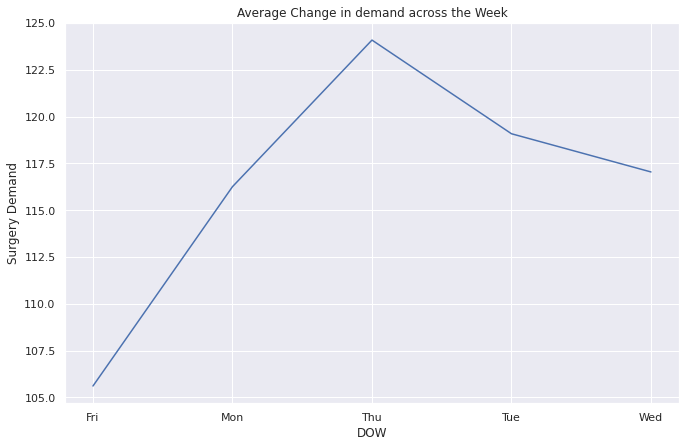

In [23]:
sns.set(font_scale=1)
plt.figure(figsize=(11,7))
sns.lineplot(y=pcu_data.groupby('DOW')['Actual'].mean(), x=pcu_data.groupby('DOW')['Actual'].mean().index)
plt.xlabel('DOW')
plt.ylabel('Surgery Demand')
plt.title('Average Change in demand across the Week')
plt.show()
# plt.savefig('Average_Change_Demand_week.svg', format='svg', dpi=1200)
# plt.close()

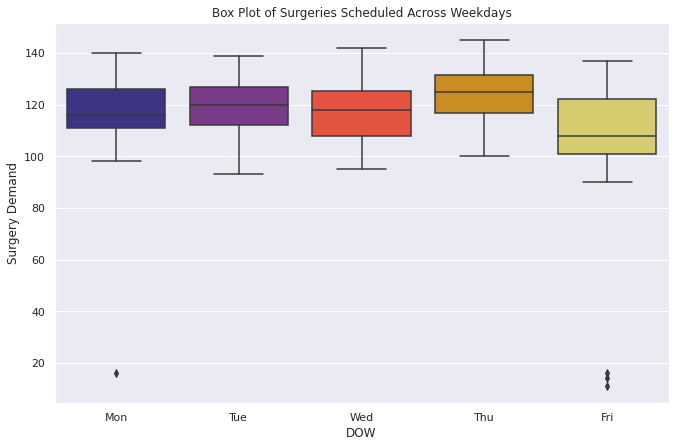

In [24]:
sns.set(font_scale=1)
plt.figure(figsize=(11,7))
sns.boxplot(x='DOW',y='Actual', data=pcu_data, palette='CMRmap')
plt.xlabel('DOW')
plt.ylabel('Surgery Demand')
plt.title('Box Plot of Surgeries Scheduled Across Weekdays')
plt.show()
# plt.savefig('box_actual_weekdays.svg', format='svg', dpi=1200)
# plt.close()

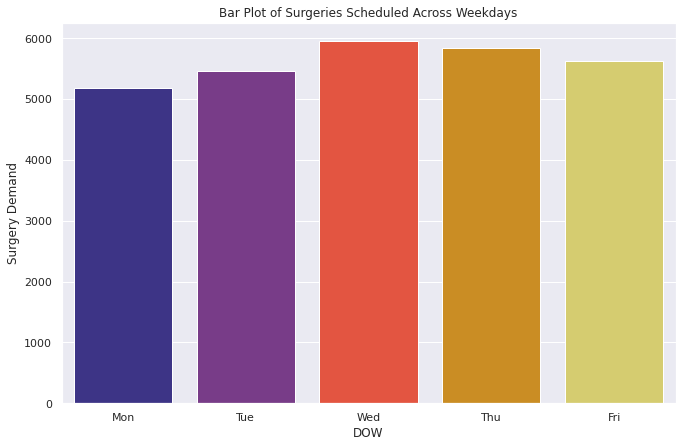

In [25]:
sns.set(font_scale=1)
plt.figure(figsize=(11,7))
sns.barplot(x=pcu_data['DOW'].unique(), y=pcu_data.groupby('DOW')["Actual"].sum(), palette="CMRmap")
plt.xlabel('DOW')
plt.ylabel('Surgery Demand')
plt.title('Bar Plot of Surgeries Scheduled Across Weekdays')
plt.show()
# plt.savefig('bar_dow_actual.svg', format='svg', dpi=1200)
# plt.close()

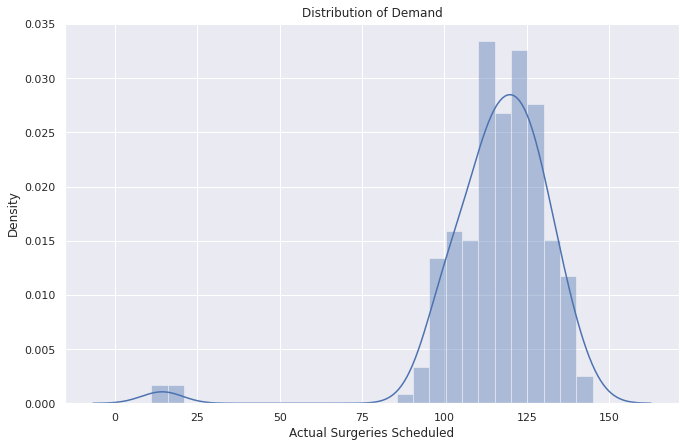

In [26]:
sns.set(font_scale=1)
plt.figure(figsize=(11,7))
sns.distplot(pcu_data['Actual'])
plt.xlabel('Actual Surgeries Scheduled')
plt.ylabel('Density')
plt.title('Distribution of Demand')
plt.show()
# plt.savefig('distribution_outliers.svg', format='svg', dpi=1200)
# plt.close()

<Figure size 792x504 with 0 Axes>

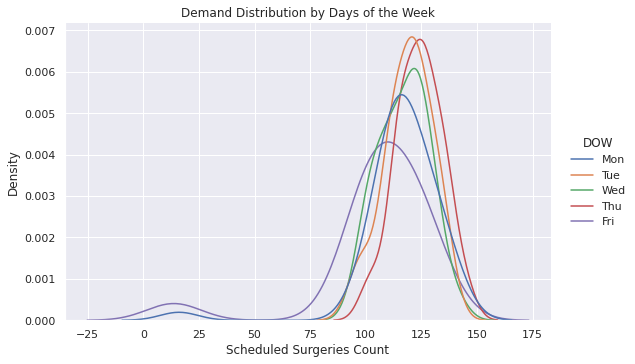

In [27]:
sns.set(font_scale=1)
plt.figure(figsize=(11,7))
sns.displot(x=pcu_data['Actual'], hue="DOW", data=pcu_data, kind="kde", fill=False,height=5, aspect=1.6)
plt.xlabel('Scheduled Surgeries Count')
plt.ylabel('Density')
plt.title('Demand Distribution by Days of the Week')
plt.show()
# plt.savefig('distribution_DOW.svg', format='svg', dpi=1200)
# plt.close()

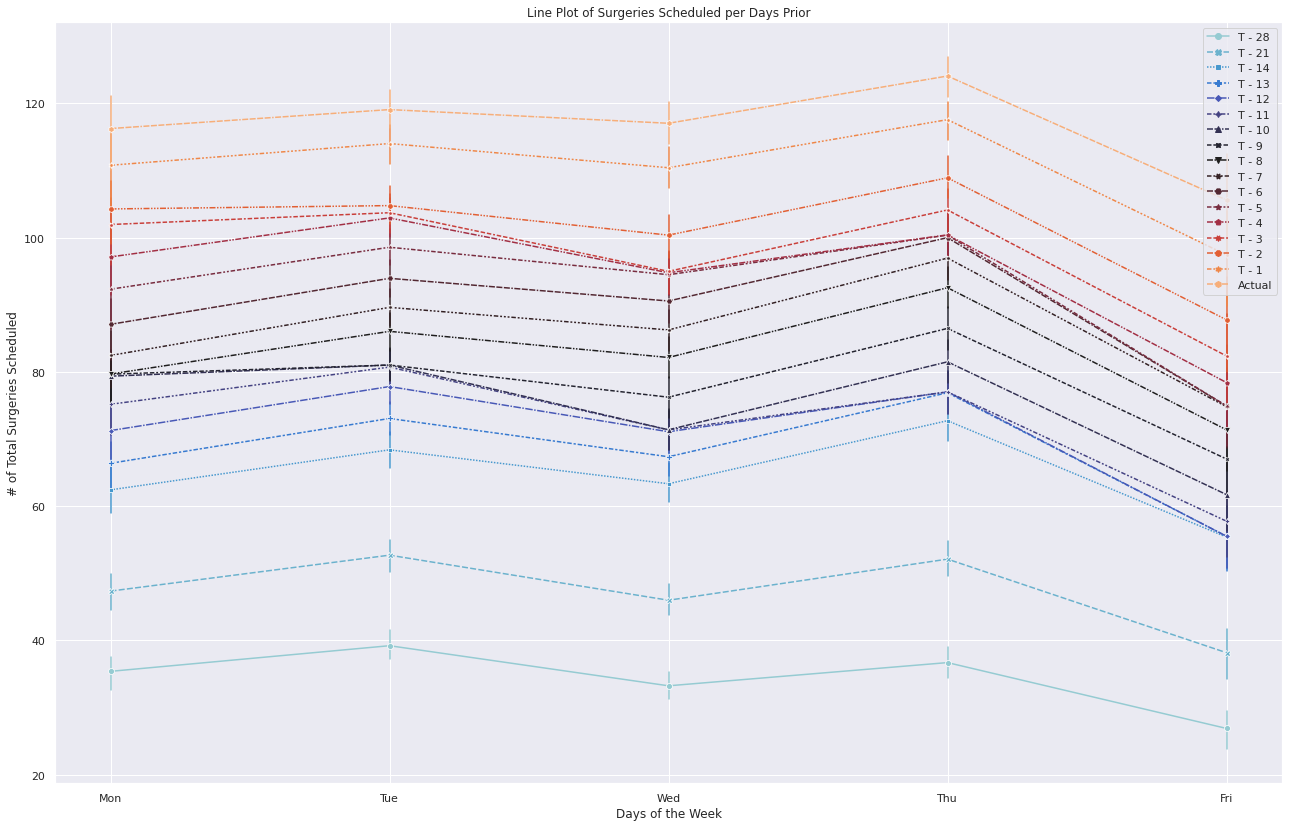

In [28]:
sns.set(font_scale=1)
plt.figure(figsize=(22,14))
sns.lineplot(data=pcu_data.set_index('DOW'), markers=True, palette="icefire", err_style="bars")
plt.xlabel('Days of the Week')
plt.ylabel('# of Total Surgeries Scheduled')
plt.title('Line Plot of Surgeries Scheduled per Days Prior')
plt.show()
# plt.savefig('line_days_prior.svg', format='svg', dpi=1200)
# plt.close()

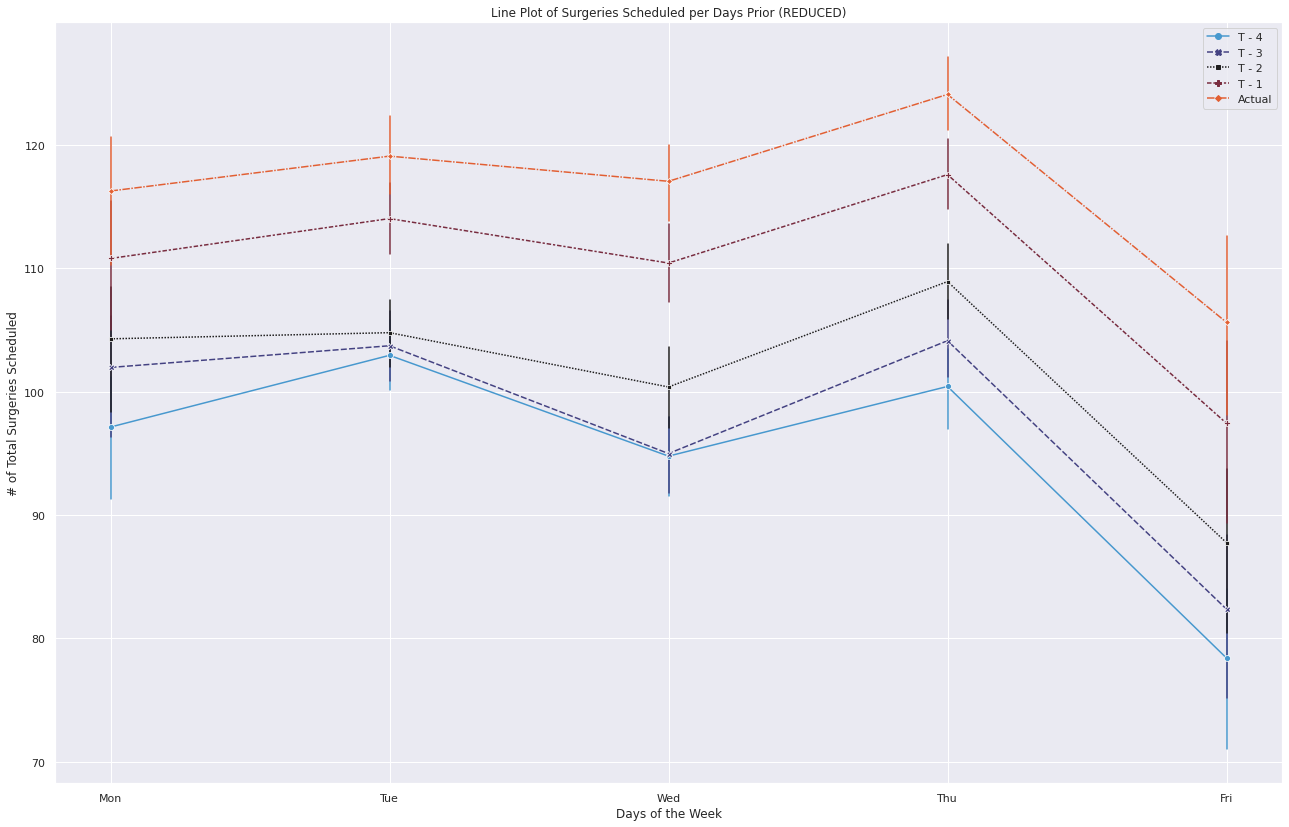

In [29]:
pcu_1_short = pcu_data[['SurgDate', 'DOW','T - 4', 'T - 3', 'T - 2', 'T - 1', 'Actual']]
sns.set(font_scale=1)
plt.figure(figsize=(22,14))
sns.lineplot(data=pcu_1_short.set_index('DOW'), markers=True, palette="icefire", err_style="bars")
plt.xlabel('Days of the Week')
plt.ylabel('# of Total Surgeries Scheduled')
plt.title('Line Plot of Surgeries Scheduled per Days Prior (REDUCED)')
plt.show()
# plt.savefig('line_days_prior_reduced.svg', format='svg', dpi=1200)
# plt.close()

In [30]:
pcu_1=pcu_data.drop(index = pcu_data[pcu_data['Actual']<21].index)
pcu_1.shape

(237, 19)

In [31]:
pcu_1.head()

SurgDate  DOW  T - 28  T - 21  T - 14  ...  T - 4  T - 3  T - 2  T - 1  Actual
0  10/10/2011  Mon      38      45      60  ...     94     98    100    104     106
1  10/11/2011  Tue      35      47      65  ...     99     99     99    114     121
2  10/12/2011  Wed      26      43      54  ...    102    102    106    114     126
3  10/13/2011  Thu      28      48      65  ...     94     97     98    103     114
4  10/14/2011  Fri      31      40      50  ...     78     83     87     94     106

[5 rows x 19 columns]

In [32]:
pcu_1['date'] = pd.to_datetime(pcu_1['SurgDate'], format="%m/%d/%Y")

pcu_1.head()

SurgDate  DOW  T - 28  T - 21  ...  T - 2  T - 1  Actual       date
0  10/10/2011  Mon      38      45  ...    100    104     106 2011-10-10
1  10/11/2011  Tue      35      47  ...     99    114     121 2011-10-11
2  10/12/2011  Wed      26      43  ...    106    114     126 2011-10-12
3  10/13/2011  Thu      28      48  ...     98    103     114 2011-10-13
4  10/14/2011  Fri      31      40  ...     87     94     106 2011-10-14

[5 rows x 20 columns]

In [33]:
# train_df = train_df.set_index('date')
pcu_1['year'] = pcu_1['date'].dt.year
pcu_1['month'] = pcu_1['date'].dt.month
pcu_1['day'] = pcu_1['date'].dt.dayofyear
pcu_1['weekday'] = pcu_1['date'].dt.weekday

pcu_1.head(10)

SurgDate  DOW  T - 28  T - 21  ...  year  month  day  weekday
0  10/10/2011  Mon      38      45  ...  2011     10  283        0
1  10/11/2011  Tue      35      47  ...  2011     10  284        1
2  10/12/2011  Wed      26      43  ...  2011     10  285        2
3  10/13/2011  Thu      28      48  ...  2011     10  286        3
4  10/14/2011  Fri      31      40  ...  2011     10  287        4
5  10/17/2011  Mon      41      56  ...  2011     10  290        0
6  10/18/2011  Tue      44      55  ...  2011     10  291        1
7  10/19/2011  Wed      32      40  ...  2011     10  292        2
8  10/20/2011  Thu      33      44  ...  2011     10  293        3
9  10/21/2011  Fri      20      32  ...  2011     10  294        4

[10 rows x 24 columns]

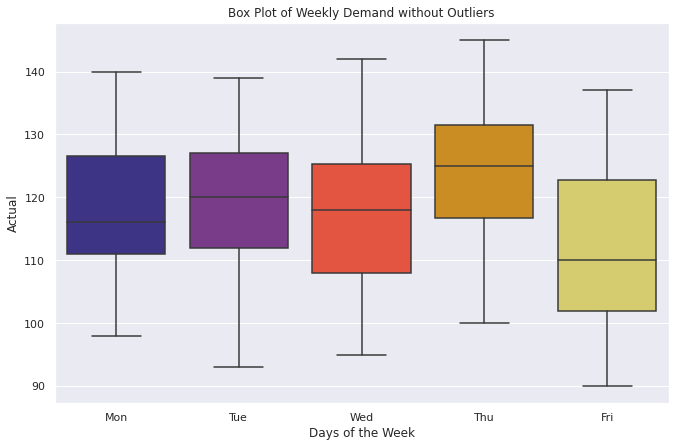

In [34]:
sns.set(font_scale=1)
plt.figure(figsize=(11,7))
sns.boxplot(x='DOW',y='Actual', data=pcu_1, palette='CMRmap')
plt.xlabel('Days of the Week')
plt.ylabel('Actual')
plt.title('Box Plot of Weekly Demand without Outliers')
plt.show()
# plt.savefig('box_no_outliers.svg', format='svg', dpi=1200)
# plt.close()

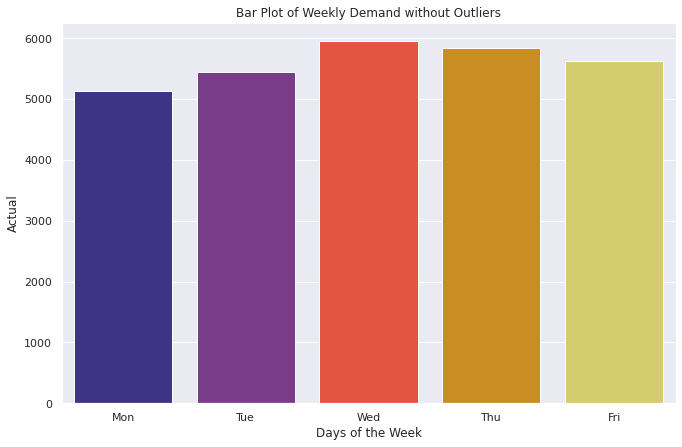

In [35]:
sns.set(font_scale=1)
plt.figure(figsize=(11,7))
sns.barplot(x=pcu_1['DOW'].unique(), y=pcu_1.groupby('DOW')["Actual"].sum(), palette="CMRmap")
plt.xlabel('Days of the Week')
plt.ylabel('Actual')
plt.title('Bar Plot of Weekly Demand without Outliers')
plt.show()
# plt.savefig('bar_no_outliers.svg', format='svg', dpi=1200)
# plt.close()

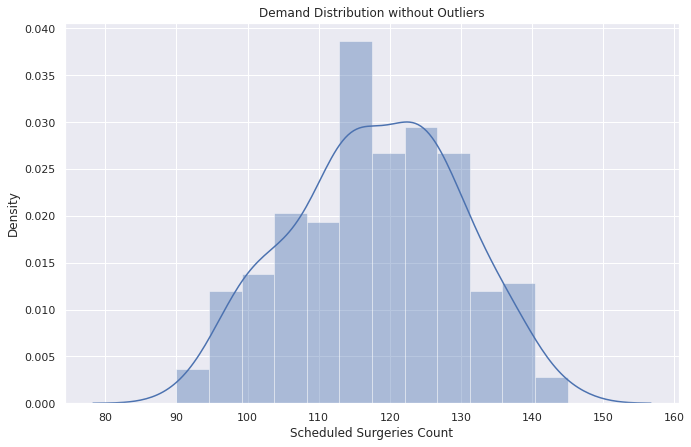

In [36]:
sns.set(font_scale=1)
plt.figure(figsize=(11,7))
sns.distplot(pcu_1['Actual'])
plt.xlabel('Scheduled Surgeries Count')
plt.ylabel('Density')
plt.title('Demand Distribution without Outliers')
plt.show()
# plt.savefig('distribution_no_outliers.svg', format='svg', dpi=1200)
# plt.close()

<Figure size 792x504 with 0 Axes>

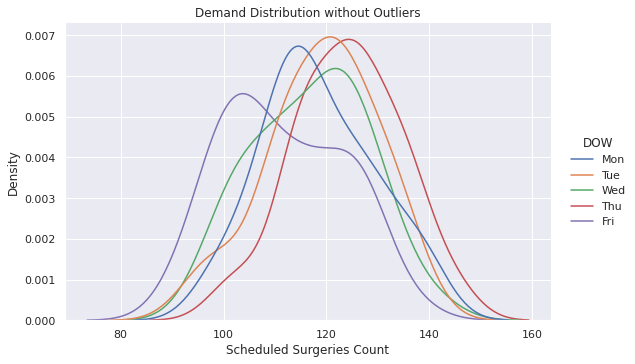

In [37]:
sns.set(font_scale=1)
plt.figure(figsize=(11,7))
sns.displot(x=pcu_1['Actual'], hue="DOW", data=pcu_1, kind="kde", fill=False,height=5, aspect=1.6)
plt.xlabel('Scheduled Surgeries Count')
plt.ylabel('Density')
plt.title('Demand Distribution without Outliers')
plt.show()
# plt.savefig('distribution_no_dow.svg', format='svg', dpi=1200)
# plt.close()

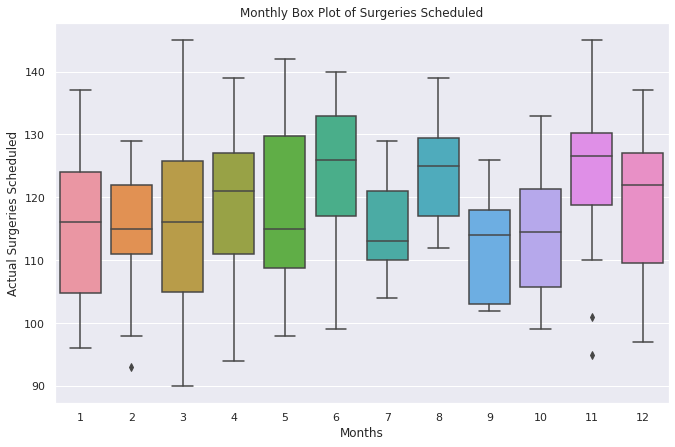

In [38]:
sns.set(font_scale=1)
plt.figure(figsize=(11,7))
sns.boxplot(x="month", y="Actual", data=pcu_1)
plt.xlabel('Months')
plt.ylabel('Actual Surgeries Scheduled')
plt.title('Monthly Box Plot of Surgeries Scheduled')
plt.show()
# plt.savefig('box_monthly.svg', format='svg', dpi=1200)
# plt.close()

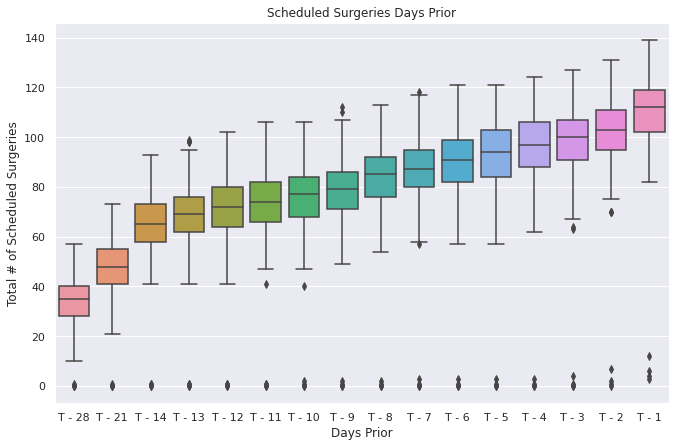

In [39]:
sns.set(font_scale=1)
plt.figure(figsize=(11,7))
sns.boxplot(data=pcu_data.loc[:, pcu_data.columns != "Actual"])
plt.xlabel('Days Prior')
plt.ylabel('Total # of Scheduled Surgeries')
plt.title('Scheduled Surgeries Days Prior')
plt.show()
# plt.savefig('box_days_prior.svg', format='svg', dpi=1200)
# plt.close()

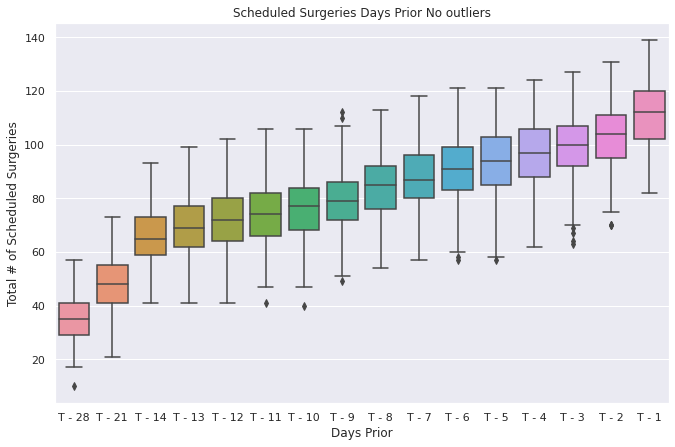

In [40]:
sns.set(font_scale=1)
plt.figure(figsize=(11,7))
sns.boxplot(data=pcu_1.loc[:, ~pcu_1.columns.isin(["Actual", "year", "month", "day","week", "weekday", "change"])])
plt.xlabel('Days Prior')
plt.ylabel('Total # of Scheduled Surgeries')
plt.title('Scheduled Surgeries Days Prior No outliers')
plt.show()
# plt.savefig('box_days_prior_noOut.svg', format='svg', dpi=1200)
# plt.close()

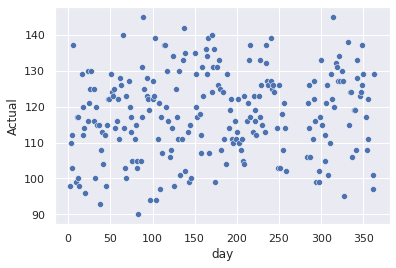

In [41]:
sns.scatterplot(x="day", y="Actual", data=pcu_1)

# SARIMAX

In [42]:
pcu_1

SurgDate  DOW  T - 28  T - 21  ...  year  month  day  weekday
0    10/10/2011  Mon      38      45  ...  2011     10  283        0
1    10/11/2011  Tue      35      47  ...  2011     10  284        1
2    10/12/2011  Wed      26      43  ...  2011     10  285        2
3    10/13/2011  Thu      28      48  ...  2011     10  286        3
4    10/14/2011  Fri      31      40  ...  2011     10  287        4
..          ...  ...     ...     ...  ...   ...    ...  ...      ...
236   9/10/2012  Mon      33      49  ...  2012      9  254        0
237   9/11/2012  Tue      31      56  ...  2012      9  255        1
238   9/12/2012  Wed      39      49  ...  2012      9  256        2
239   9/13/2012  Thu      34      51  ...  2012      9  257        3
240   9/14/2012  Fri      27      41  ...  2012      9  258        4

[237 rows x 24 columns]

In [43]:
pcu_1["Actual"] = pcu_1["Actual"].astype(float)

In [44]:
pcu_2 = pcu_1.copy()

In [45]:
pcu_2.set_index("month")

SurgDate  DOW  T - 28  T - 21  ...       date  year  day  weekday
month                                   ...                               
10     10/10/2011  Mon      38      45  ... 2011-10-10  2011  283        0
10     10/11/2011  Tue      35      47  ... 2011-10-11  2011  284        1
10     10/12/2011  Wed      26      43  ... 2011-10-12  2011  285        2
10     10/13/2011  Thu      28      48  ... 2011-10-13  2011  286        3
10     10/14/2011  Fri      31      40  ... 2011-10-14  2011  287        4
...           ...  ...     ...     ...  ...        ...   ...  ...      ...
9       9/10/2012  Mon      33      49  ... 2012-09-10  2012  254        0
9       9/11/2012  Tue      31      56  ... 2012-09-11  2012  255        1
9       9/12/2012  Wed      39      49  ... 2012-09-12  2012  256        2
9       9/13/2012  Thu      34      51  ... 2012-09-13  2012  257        3
9       9/14/2012  Fri      27      41  ... 2012-09-14  2012  258        4

[237 rows x 23 columns]

<Figure size 432x288 with 0 Axes>

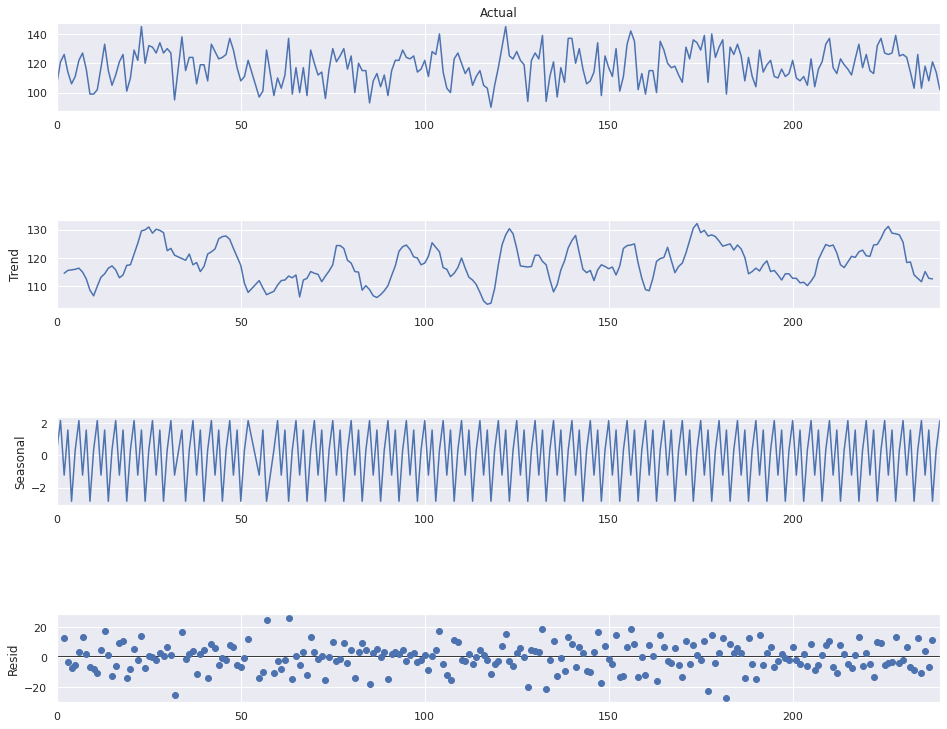

In [46]:
result = seasonal_decompose(pcu_1['Actual'], model='additive', period=5)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)
# plt.savefig('seasonal_decompose.svg', format='svg', dpi=1200)
# plt.close()

In [47]:
pcu_1["Actual"]

0      106.0
1      121.0
2      126.0
3      114.0
4      106.0
       ...  
236    118.0
237    108.0
238    121.0
239    114.0
240    102.0
Name: Actual, Length: 237, dtype: float64

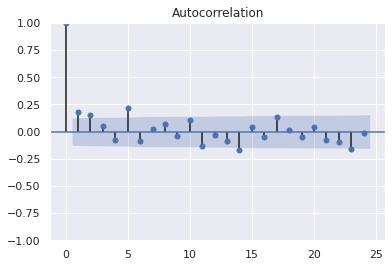

In [48]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(pcu_1["Actual"])
plt.show()
# plt.savefig('autocorrelation.svg', format='svg', dpi=1200)
# plt.close()

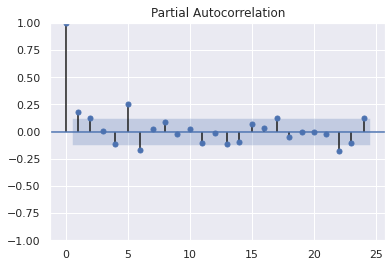

In [49]:
plot_pacf(pcu_1["Actual"])
plt.show()
# plt.savefig('partial_ac.svg', format='svg', dpi=1200)
# plt.close()

In [50]:
pcu_1.columns

Index(['SurgDate', 'DOW', 'T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12',
       'T - 11', 'T - 10', 'T - 9', 'T - 8', 'T - 7', 'T - 6', 'T - 5',
       'T - 4', 'T - 3', 'T - 2', 'T - 1', 'Actual', 'date', 'year', 'month',
       'day', 'weekday'],
      dtype='object')

In [51]:
pcu_1["Actual"][:-1]

0      106.0
1      121.0
2      126.0
3      114.0
4      106.0
       ...  
235    103.0
236    118.0
237    108.0
238    121.0
239    114.0
Name: Actual, Length: 236, dtype: float64

In [52]:
pcu_1['DOW'].unique()

array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'], dtype=object)

In [53]:
pcu_1.groupby('DOW')["Actual"].value_counts()

DOW  Actual
Fri  115.0     3
     94.0      2
     98.0      2
     99.0      2
     101.0     2
              ..
Wed  120.0     1
     124.0     1
     125.0     1
     137.0     1
     142.0     1
Name: Actual, Length: 147, dtype: int64

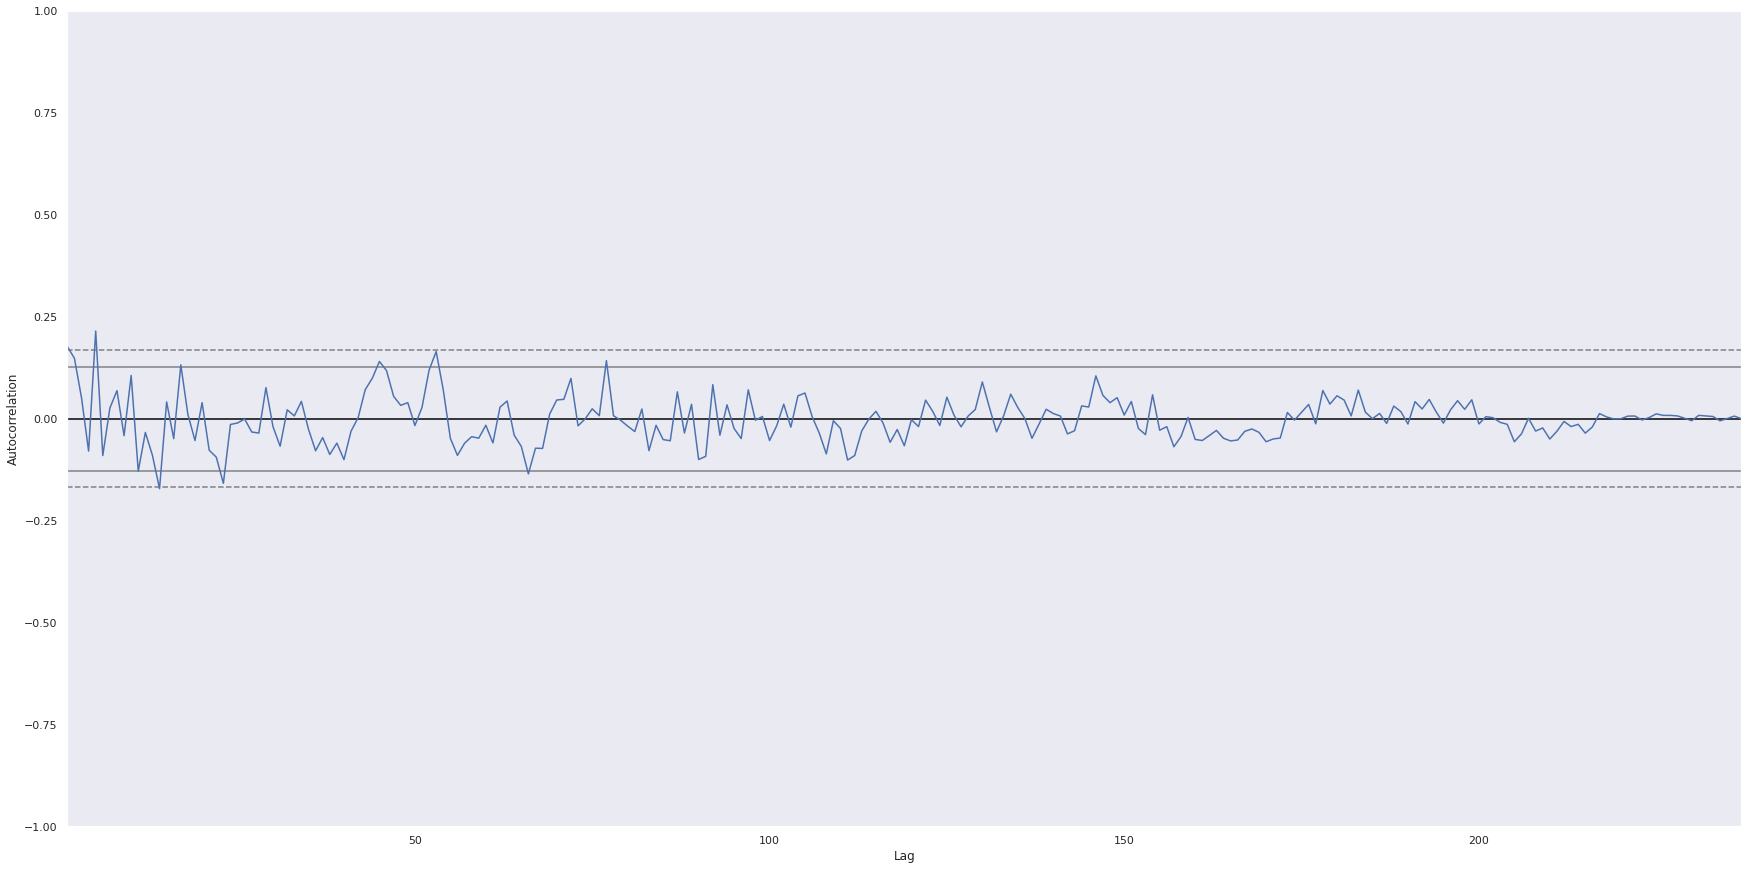

In [54]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(30,15))
autocorrelation_plot(pcu_1["Actual"])
plt.show()
# plt.savefig('autocorrelation_plot1.svg', format='svg', dpi=1200)
# plt.close()

In [55]:
pcu_1["change"] = pcu_1["Actual"].pct_change()

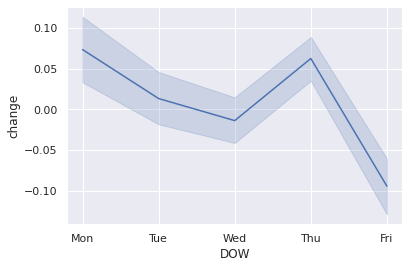

In [56]:
sns.lineplot(data=pcu_1.set_index("DOW")["change"])
# plt.savefig('change_dow.svg', format='svg', dpi=1200)
# plt.close()

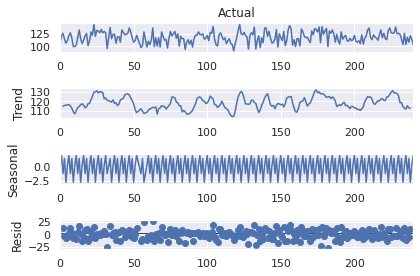

In [57]:
a = seasonal_decompose(pcu_1["Actual"], model = "additive",period=5)
a.plot();
# plt.savefig('seasonal_decompose.svg', format='svg', dpi=1200)
# plt.close()

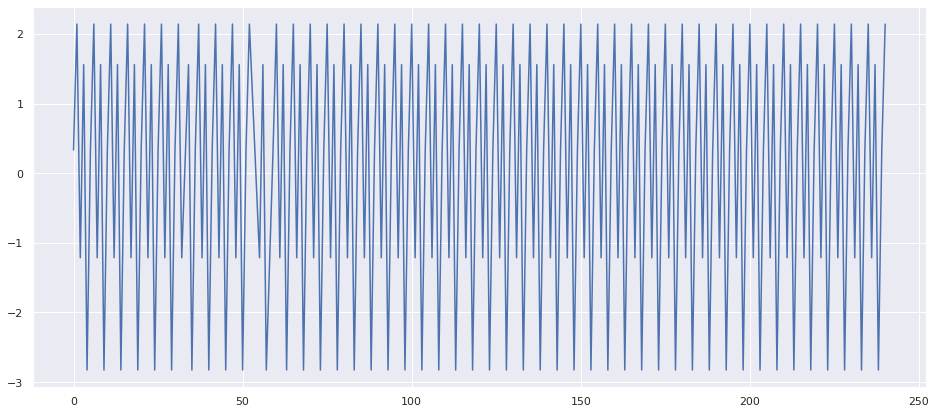

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [59]:
auto_arima(pcu_1["Actual"], 
           seasonal=False, 
           m=24,max_p=7, 
           max_d=5,max_q=7, 
           max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  237
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -912.585
Date:                Mon, 25 Oct 2021   AIC                           1833.170
Time:                        13:50:04   BIC                           1847.042
Sample:                             0   HQIC                          1838.761
                                - 237                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     85.0398     10.083      8.434      0.000      65.278     104.801
ar.L1          0.1578      0.067      2.351      0.019       0.026       0.289
ar.L2          0.1218      0.067      1.824      0.068      -0.009       0.253
sigma2       129.4106     14.158      9.140      0.000     101.661     157.160
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.39
Prob(Q):                              0.98   Prob(JB):                         0.18
Heteroskedasticity (H):               0.77   Skew:                            -0.15
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
int(len(pcu_1)*0.7)

165

In [61]:
len(pcu_1) - round(len(pcu_1)*0.7,0)

71.0

In [62]:
train = pcu_1["Actual"][:int(len(pcu_1)*0.7)]
test = pcu_1["Actual"][int(len(pcu_1)*0.7):]
print(train.head())
print(test.head())

0    106.0
1    121.0
2    126.0
3    114.0
4    106.0
Name: Actual, dtype: float64
169    112.0
170    107.0
171    131.0
172    123.0
173    136.0
Name: Actual, dtype: float64


In [63]:
arima_model = SARIMAX(train, order = (2,0,0))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Actual   No. Observations:                  165
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -669.542
Date:                Mon, 25 Oct 2021   AIC                           1345.083
Time:                        13:50:04   BIC                           1354.401
Sample:                             0   HQIC                          1348.866
                                - 165                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5470      0.074      7.435      0.000       0.403       0.691
ar.L2          0.4481      0.075      5.980      0.000       0.301       0.595
sigma2       190.6873     22.761      8.378      0.000     146.077     235.298
===================================================================================
Ljung-Box (L1) (Q):                   1.62   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.20   Prob(JB):                         0.64
Heteroskedasticity (H):               1.33   Skew:                            -0.13
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
arima_pred = arima_result.predict(start = len(train), end = len(pcu_1)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

165    116.968747
166    116.852728
167    116.327196
168    115.987750
169    115.566603
          ...    
232     93.200892
233     92.883133
234     92.566458
235     92.250863
236     91.936343
Name: ARIMA Predictions, Length: 72, dtype: float64

In [65]:
test.plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);
plt.savefig('sarimax_fit.svg', format='svg', dpi=1200)
plt.close()

In [66]:
arima_rmse_error = rmse(test, arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = pcu_1["Actual"].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 397.3419716083756
RMSE Error: 19.93343852947543
Mean: 118.10548523206751


In [67]:
test

169    112.0
170    107.0
171    131.0
172    123.0
173    136.0
       ...  
236    118.0
237    108.0
238    121.0
239    114.0
240    102.0
Name: Actual, Length: 72, dtype: float64

In [68]:
pred = pd.DataFrame(test)
pred = pred.reset_index(drop = True)
pred = pred.rename(columns={"Actual":"Sarima"})
pred

Sarima
0    112.0
1    107.0
2    131.0
3    123.0
4    136.0
..     ...
67   118.0
68   108.0
69   121.0
70   114.0
71   102.0

[72 rows x 1 columns]

# LINEAR REGRESSION WITH OUTLIERS

In [69]:
reg = pcu_data.copy()
reg

SurgDate  DOW  T - 28  T - 21  ...  T - 3  T - 2  T - 1  Actual
0    10/10/2011  Mon      38      45  ...     98    100    104     106
1    10/11/2011  Tue      35      47  ...     99     99    114     121
2    10/12/2011  Wed      26      43  ...    102    106    114     126
3    10/13/2011  Thu      28      48  ...     97     98    103     114
4    10/14/2011  Fri      31      40  ...     83     87     94     106
..          ...  ...     ...     ...  ...    ...    ...    ...     ...
236   9/10/2012  Mon      33      49  ...    103    109    110     118
237   9/11/2012  Tue      31      56  ...     98     98     99     108
238   9/12/2012  Wed      39      49  ...    100    104    115     121
239   9/13/2012  Thu      34      51  ...     97    101    106     114
240   9/14/2012  Fri      27      41  ...     81     86    101     102

[241 rows x 19 columns]

In [70]:
train = reg[:int(len(reg)*0.7)]
train.insert(2, "x0",1)
test = reg[int(len(reg)*0.7):]
test.insert(2, "x0",1)
print(train.head())
print(test.head())

     SurgDate  DOW  x0  T - 28  T - 21  ...  T - 4  T - 3  T - 2  T - 1  Actual
0  10/10/2011  Mon   1      38      45  ...     94     98    100    104     106
1  10/11/2011  Tue   1      35      47  ...     99     99     99    114     121
2  10/12/2011  Wed   1      26      43  ...    102    102    106    114     126
3  10/13/2011  Thu   1      28      48  ...     94     97     98    103     114
4  10/14/2011  Fri   1      31      40  ...     78     83     87     94     106

[5 rows x 20 columns]
     SurgDate  DOW  x0  T - 28  T - 21  ...  T - 4  T - 3  T - 2  T - 1  Actual
168  6/4/2012  Mon   1      38      56  ...    102    109    112    119     118
169  6/5/2012  Tue   1      36      52  ...     96     98    100    107     112
170  6/6/2012  Wed   1      28      42  ...     89     90     93    101     107
171  6/7/2012  Thu   1      44      55  ...    109    113    119    123     131
172  6/8/2012  Fri   1      34      49  ...     91     95    100    109     123

[5 rows x 20 col

In [71]:
X = train.iloc[:,2:-1]
y = train.iloc[:,-1:]
print(X)
print(y)

     x0  T - 28  T - 21  T - 14  T - 13  ...  T - 5  T - 4  T - 3  T - 2  T - 1
0     1      38      45      60      63  ...     89     94     98    100    104
1     1      35      47      65      68  ...     95     99     99     99    114
2     1      26      43      54      62  ...    101    102    102    106    114
3     1      28      48      65      70  ...     94     94     97     98    103
4     1      31      40      50      50  ...     73     78     83     87     94
..   ..     ...     ...     ...     ...  ...    ...    ...    ...    ...    ...
163   1      24      35      49      49  ...     75     76     80     82     94
164   1      34      51      61      69  ...    105    107    108    111    123
165   1      38      59      76      79  ...    107    106    106    107    123
166   1      40      55      71      76  ...    100    100    100    108    118
167   1      28      36      59      59  ...     81     81     81     94    103

[168 rows x 17 columns]
     Actual
0  

In [72]:
testX = test.iloc[:,2:-1]
testy = test.iloc[:,-1:]
print(testX)
print(testy)

     x0  T - 28  T - 21  T - 14  T - 13  ...  T - 5  T - 4  T - 3  T - 2  T - 1
168   1      38      56      77      80  ...     95    102    109    112    119
169   1      36      52      66      73  ...     88     96     98    100    107
170   1      28      42      56      60  ...     88     89     90     93    101
171   1      44      55      86      92  ...    109    109    113    119    123
172   1      34      49      67      67  ...     90     91     95    100    109
..   ..     ...     ...     ...     ...  ...    ...    ...    ...    ...    ...
236   1      33      49      68      71  ...     97    101    103    109    110
237   1      31      56      68      70  ...     94     97     98     98     99
238   1      39      49      69      78  ...     99     99    100    104    115
239   1      34      51      68      77  ...     99     99     97    101    106
240   1      27      41      63      63  ...     77     78     81     86    101

[73 rows x 17 columns]
     Actual
168 

In [73]:
# 2. With statsmodels
ols = sm.OLS(y, X).fit()
predictions = ols.predict(testX)
print_model = ols.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           2.25e-93
Time:                        13:50:05   Log-Likelihood:                -477.71
No. Observations:                 168   AIC:                             989.4
Df Residuals:                     151   BIC:                             1043.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0             9.3413      1.957      4.774      0.0

In [74]:
ols_result = pd.DataFrame(predictions)

In [75]:
ols_result = ols_result.rename(columns={0:"Ols"})
ols_result = ols_result.reset_index(drop=True)
ols_result

Ols
0   124.693764
1   115.041645
2   105.436309
3   130.463407
4   116.370853
..         ...
68  117.721755
69  105.363645
70  120.212880
71  112.373320
72  109.289758

[73 rows x 1 columns]

In [76]:
X = train.iloc[:,3:-1]
y = train.iloc[:,-1:]
print(X)
print(y)

     T - 28  T - 21  T - 14  T - 13  T - 12  ...  T - 5  T - 4  T - 3  T - 2  T - 1
0        38      45      60      63      65  ...     89     94     98    100    104
1        35      47      65      68      78  ...     95     99     99     99    114
2        26      43      54      62      72  ...    101    102    102    106    114
3        28      48      65      70      72  ...     94     94     97     98    103
4        31      40      50      50      50  ...     73     78     83     87     94
..      ...     ...     ...     ...     ...  ...    ...    ...    ...    ...    ...
163      24      35      49      49      49  ...     75     76     80     82     94
164      34      51      61      69      75  ...    105    107    108    111    123
165      38      59      76      79      82  ...    107    106    106    107    123
166      40      55      71      76      76  ...    100    100    100    108    118
167      28      36      59      59      59  ...     81     81     81     94

In [77]:
testX = test.iloc[:,3:-1]
testy = test.iloc[:,-1:]
print(testX)
print(testy)

     T - 28  T - 21  T - 14  T - 13  T - 12  ...  T - 5  T - 4  T - 3  T - 2  T - 1
168      38      56      77      80      81  ...     95    102    109    112    119
169      36      52      66      73      79  ...     88     96     98    100    107
170      28      42      56      60      67  ...     88     89     90     93    101
171      44      55      86      92      92  ...    109    109    113    119    123
172      34      49      67      67      67  ...     90     91     95    100    109
..      ...     ...     ...     ...     ...  ...    ...    ...    ...    ...    ...
236      33      49      68      71      82  ...     97    101    103    109    110
237      31      56      68      70      74  ...     94     97     98     98     99
238      39      49      69      78      81  ...     99     99    100    104    115
239      34      51      68      77      75  ...     99     99     97    101    106
240      27      41      63      63      63  ...     77     78     81     86

In [78]:
#Fitting Simple Linear regression data model
from sklearn.linear_model import LinearRegression
regressorObject=LinearRegression()
regressorObject.fit(X,y)

#predict number of surgeries for the data set
y_pred_test_data=regressorObject.predict(testX)

In [79]:
Predicted = pd.DataFrame(y_pred_test_data, columns = ['Linear-Outl'])

In [80]:
Actual_y = testy.reset_index(drop=True)

In [81]:
result = pd.concat([Actual_y, Predicted, ols_result], ignore_index=True, axis=1)
result.columns = ['Actual','Linear-Outl', "Ols"]
result['Linear-Outl'] = round(result['Linear-Outl'])

In [82]:
final = result.dropna()
final.tail(10)

Actual  Linear-Outl         Ols
63     124        122.0  121.874712
64     114        121.0  121.010937
65     103        100.0  100.258463
66     126        125.0  124.594324
67     103        100.0  100.350045
68     118        118.0  117.721755
69     108        105.0  105.363645
70     121        120.0  120.212880
71     114        112.0  112.373320
72     102        109.0  109.289758

In [83]:
y = final['Actual']
yhat = final['Linear-Outl']
d = y - yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

Results by manual calculation:
MAE: 4.109589041095891
MSE: 31.095890410958905
RMSE: 5.576368927084982
R-Squared: 0.7113408167673516


In [84]:
y = final['Actual']
yhat = final['Ols']
d = y - yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

Results by manual calculation:
MAE: 4.1386959106051115
MSE: 31.499732915331993
RMSE: 5.61246228631712
R-Squared: 0.7075919983245814


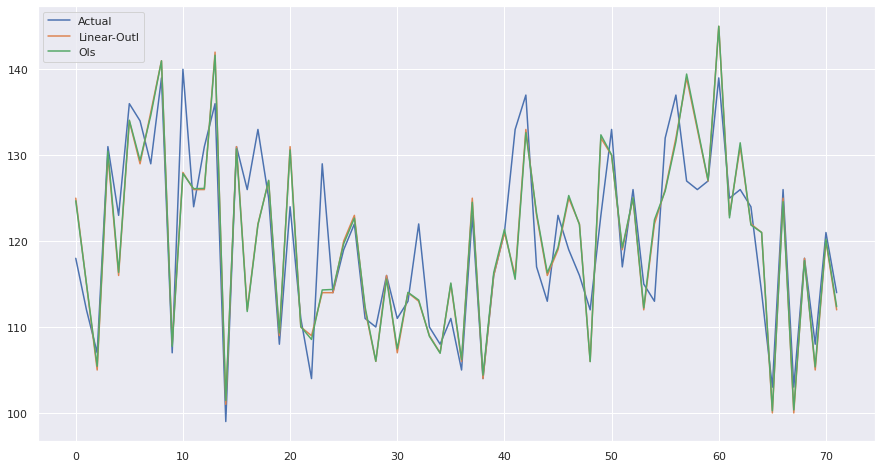

In [165]:
plt.figure(figsize=[15,8])
plt.rcParams['font.size'] = '16'
plt.grid(True)
plt.plot(final['Actual'],label='Actual')
plt.plot(final['Linear-Outl'],label='Linear-Outl')
plt.plot(final["Ols"], label="Ols")
# plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)

# LINEAR REGRESSION WITHOUT OUTLIERS

In [86]:
reg = pcu_1.copy().drop(["date","change", "year","month","day","weekday"], axis=1)
reg

SurgDate  DOW  T - 28  T - 21  ...  T - 3  T - 2  T - 1  Actual
0    10/10/2011  Mon      38      45  ...     98    100    104   106.0
1    10/11/2011  Tue      35      47  ...     99     99    114   121.0
2    10/12/2011  Wed      26      43  ...    102    106    114   126.0
3    10/13/2011  Thu      28      48  ...     97     98    103   114.0
4    10/14/2011  Fri      31      40  ...     83     87     94   106.0
..          ...  ...     ...     ...  ...    ...    ...    ...     ...
236   9/10/2012  Mon      33      49  ...    103    109    110   118.0
237   9/11/2012  Tue      31      56  ...     98     98     99   108.0
238   9/12/2012  Wed      39      49  ...    100    104    115   121.0
239   9/13/2012  Thu      34      51  ...     97    101    106   114.0
240   9/14/2012  Fri      27      41  ...     81     86    101   102.0

[237 rows x 19 columns]

In [87]:
train = reg[:int(len(reg)*0.7)]
test = reg[int(len(reg)*0.7):]
print(train.head())
print(test.head())

     SurgDate  DOW  T - 28  T - 21  T - 14  ...  T - 4  T - 3  T - 2  T - 1  Actual
0  10/10/2011  Mon      38      45      60  ...     94     98    100    104   106.0
1  10/11/2011  Tue      35      47      65  ...     99     99     99    114   121.0
2  10/12/2011  Wed      26      43      54  ...    102    102    106    114   126.0
3  10/13/2011  Thu      28      48      65  ...     94     97     98    103   114.0
4  10/14/2011  Fri      31      40      50  ...     78     83     87     94   106.0

[5 rows x 19 columns]
      SurgDate  DOW  T - 28  T - 21  T - 14  ...  T - 4  T - 3  T - 2  T - 1  Actual
169   6/5/2012  Tue      36      52      66  ...     96     98    100    107   112.0
170   6/6/2012  Wed      28      42      56  ...     89     90     93    101   107.0
171   6/7/2012  Thu      44      55      86  ...    109    113    119    123   131.0
172   6/8/2012  Fri      34      49      67  ...     91     95    100    109   123.0
173  6/11/2012  Mon      42      64      79  ...

In [88]:
X = train.iloc[:,2:-1]
y = train.iloc[:,-1:]
print(X)
print(y)

     T - 28  T - 21  T - 14  T - 13  T - 12  ...  T - 5  T - 4  T - 3  T - 2  T - 1
0        38      45      60      63      65  ...     89     94     98    100    104
1        35      47      65      68      78  ...     95     99     99     99    114
2        26      43      54      62      72  ...    101    102    102    106    114
3        28      48      65      70      72  ...     94     94     97     98    103
4        31      40      50      50      50  ...     73     78     83     87     94
..      ...     ...     ...     ...     ...  ...    ...    ...    ...    ...    ...
164      34      51      61      69      75  ...    105    107    108    111    123
165      38      59      76      79      82  ...    107    106    106    107    123
166      40      55      71      76      76  ...    100    100    100    108    118
167      28      36      59      59      59  ...     81     81     81     94    103
168      38      56      77      80      81  ...     95    102    109    112

In [89]:
testX = test.iloc[:,2:-1]
testy = test.iloc[:,-1:]
print(testX)
print(testy)

     T - 28  T - 21  T - 14  T - 13  T - 12  ...  T - 5  T - 4  T - 3  T - 2  T - 1
169      36      52      66      73      79  ...     88     96     98    100    107
170      28      42      56      60      67  ...     88     89     90     93    101
171      44      55      86      92      92  ...    109    109    113    119    123
172      34      49      67      67      67  ...     90     91     95    100    109
173      42      64      79      86      90  ...    107    111    118    121    128
..      ...     ...     ...     ...     ...  ...    ...    ...    ...    ...    ...
236      33      49      68      71      82  ...     97    101    103    109    110
237      31      56      68      70      74  ...     94     97     98     98     99
238      39      49      69      78      81  ...     99     99    100    104    115
239      34      51      68      77      75  ...     99     99     97    101    106
240      27      41      63      63      63  ...     77     78     81     86

In [90]:
# 2. With statsmodels
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                 Actual   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              6858.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):                   8.14e-205
Time:                        13:50:06   Log-Likelihood:                         -476.34
No. Observations:                 165   AIC:                                      984.7
Df Residuals:                     149   BIC:                                      1034.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [91]:
#Fitting Simple Linear regression data model
from sklearn.linear_model import LinearRegression
regressorObject=LinearRegression()
regressorObject.fit(X,y)

#predict number of surgeries for the data set
predict = testX
y_pred_test_data=regressorObject.predict(predict)

In [92]:
predicted_noOut = pd.DataFrame(y_pred_test_data, columns = ['Linear-NoOutl'])

In [93]:
predicted_noOut

Linear-NoOutl
0      114.885752
1      105.997410
2      129.807247
3      116.509245
4      133.378646
..            ...
67     117.836902
68     105.477692
69     120.059419
70     112.320812
71     109.401602

[72 rows x 1 columns]

In [94]:
final.columns

Index(['Actual', 'Linear-Outl', 'Ols'], dtype='object')

In [95]:
result = pd.concat([final, predicted_noOut], ignore_index=True, axis=1)
result.columns = ['Actual', 'Linear-Outl', 'Ols',"LinearR-NoOutl"]
result['LinearR-NoOult'] = round(result['LinearR-NoOutl'])

In [96]:
final = result.dropna()
final.tail(10)

Actual  Linear-Outl         Ols  LinearR-NoOutl  LinearR-NoOult
62     126        131.0  131.445717      121.643408           122.0
63     124        122.0  121.874712      120.623068           121.0
64     114        121.0  121.010937      100.761287           101.0
65     103        100.0  100.258463      124.443083           124.0
66     126        125.0  124.594324      100.829776           101.0
67     103        100.0  100.350045      117.836902           118.0
68     118        118.0  117.721755      105.477692           105.0
69     108        105.0  105.363645      120.059419           120.0
70     121        120.0  120.212880      112.320812           112.0
71     114        112.0  112.373320      109.401602           109.0

In [97]:
y = final['Actual']
yhat = final['LinearR-NoOutl']
d = y - yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

Results by manual calculation:
MAE: 10.32981190461849
MSE: 167.27208157108237
RMSE: 12.93337085106131
R-Squared: -0.5984708576620168


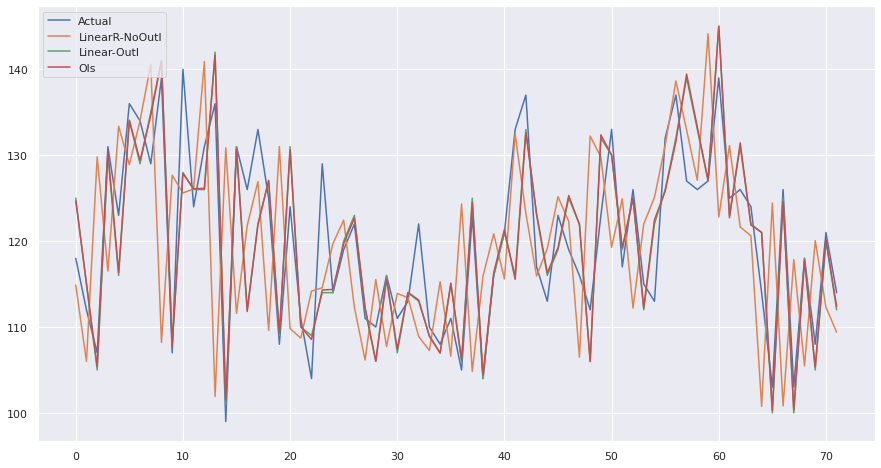

In [98]:
plt.figure(figsize=[15,8])
plt.grid(True)
plt.plot(final['Actual'],label='Actual')
plt.plot(final['LinearR-NoOutl'],label='LinearR-NoOutl')
plt.plot(final['Linear-Outl'],label='Linear-Outl')
plt.plot(final["Ols"], label="Ols")
# plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)

# PROPHET WITH OUTLIERS

In [99]:
df = pcu_data.copy()
df_p = df[["SurgDate","Actual"]]
df_p.rename(columns = {'SurgDate':'ds', 'Actual':'y'}, inplace = True)
df_p

ds    y
0    10/10/2011  106
1    10/11/2011  121
2    10/12/2011  126
3    10/13/2011  114
4    10/14/2011  106
..          ...  ...
236   9/10/2012  118
237   9/11/2012  108
238   9/12/2012  121
239   9/13/2012  114
240   9/14/2012  102

[241 rows x 2 columns]

In [100]:
train = df_p[:int(len(reg)*0.7)]
test = df_p[int(len(reg)*0.7):]
print(train.head())
print(test.head())

           ds    y
0  10/10/2011  106
1  10/11/2011  121
2  10/12/2011  126
3  10/13/2011  114
4  10/14/2011  106
            ds    y
165  5/30/2012  129
166  5/31/2012  120
167   6/1/2012  117
168   6/4/2012  118
169   6/5/2012  112


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


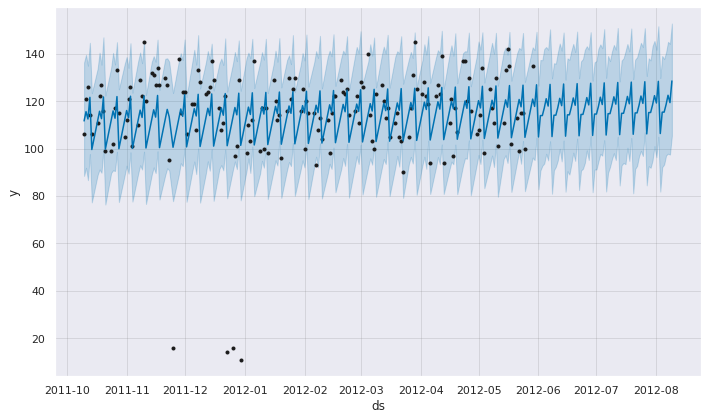

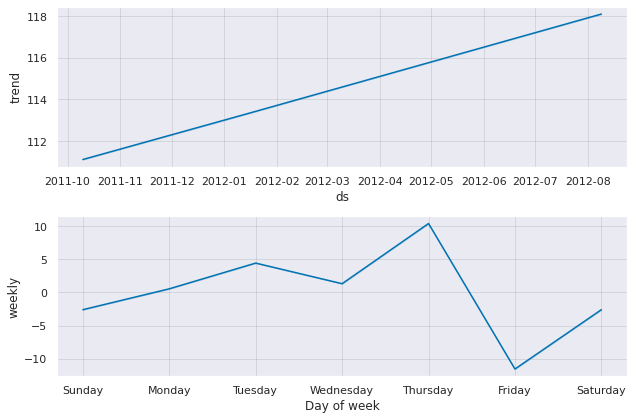

ds       trend  ...  multiplicative_terms_upper        yhat
0   2011-10-10  111.116101  ...                         0.0  111.675448
1   2011-10-11  111.138852  ...                         0.0  115.593087
2   2011-10-12  111.161603  ...                         0.0  112.494633
3   2011-10-13  111.184355  ...                         0.0  121.633185
4   2011-10-14  111.207106  ...                         0.0   99.616053
..         ...         ...  ...                         ...         ...
232 2012-08-05  118.004457  ...                         0.0  115.402262
233 2012-08-06  118.027497  ...                         0.0  118.586844
234 2012-08-07  118.050536  ...                         0.0  122.504771
235 2012-08-08  118.073576  ...                         0.0  119.406606
236 2012-08-09  118.096616  ...                         0.0  128.545446

[237 rows x 16 columns]

In [101]:
# Loading the library
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

# Fitting the model
model = Prophet(daily_seasonality=False) 
model.fit(train) #fit the  model.

# Predict
future = model.make_future_dataframe(periods=72) # predicting for ~ 72 days like test data
forecast = model.predict(future) # Predict future

# Plot results
fig1 = model.plot(forecast) # Plot the fit to past data and future forcast.
fig2 = model.plot_components(forecast) # Plot breakdown of components.
plt.show()
forecast # Displaying various results in table format.

In [102]:
final["prophet_Out"] = forecast["yhat"]

In [103]:
final

Actual  Linear-Outl  ...  LinearR-NoOult  prophet_Out
0      118        125.0  ...           115.0   111.675448
1      112        115.0  ...           106.0   115.593087
2      107        105.0  ...           130.0   112.494633
3      131        130.0  ...           117.0   121.633185
4      123        116.0  ...           133.0    99.616053
..     ...          ...  ...             ...          ...
67     103        100.0  ...           118.0   123.707073
68     118        118.0  ...           105.0   101.690216
69     108        105.0  ...           120.0   113.909736
70     121        120.0  ...           112.0   117.827663
71     114        112.0  ...           109.0   114.729498

[72 rows x 6 columns]

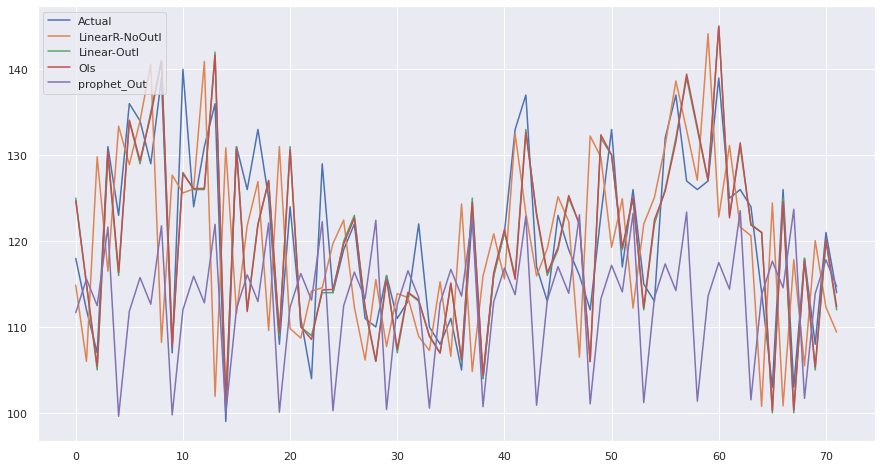

In [104]:
plt.figure(figsize=[15,8])
plt.grid(True)
plt.plot(final['Actual'],label='Actual')
plt.plot(final['LinearR-NoOutl'],label='LinearR-NoOutl')
plt.plot(final['Linear-Outl'],label='Linear-Outl')
plt.plot(final["Ols"], label="Ols")
plt.plot(final["prophet_Out"], label="prophet_Out")
# plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)

# PROPHET WITHOUT OUTLIERS

In [105]:
df = pcu_1.copy()
df_p = df[["SurgDate","Actual"]]
df_p.rename(columns = {'SurgDate':'ds', 'Actual':'y'}, inplace = True)
df_p

ds      y
0    10/10/2011  106.0
1    10/11/2011  121.0
2    10/12/2011  126.0
3    10/13/2011  114.0
4    10/14/2011  106.0
..          ...    ...
236   9/10/2012  118.0
237   9/11/2012  108.0
238   9/12/2012  121.0
239   9/13/2012  114.0
240   9/14/2012  102.0

[237 rows x 2 columns]

In [106]:
train = df_p[:int(len(reg)*0.7)]
test = df_p[int(len(reg)*0.7):]
print(train.head())
print(test.head())

           ds      y
0  10/10/2011  106.0
1  10/11/2011  121.0
2  10/12/2011  126.0
3  10/13/2011  114.0
4  10/14/2011  106.0
            ds      y
169   6/5/2012  112.0
170   6/6/2012  107.0
171   6/7/2012  131.0
172   6/8/2012  123.0
173  6/11/2012  136.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


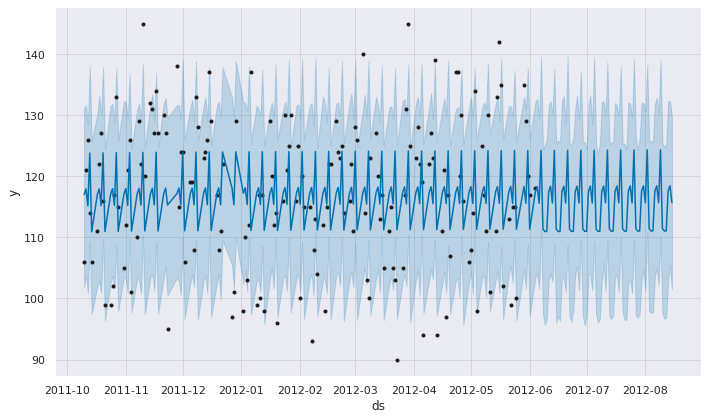

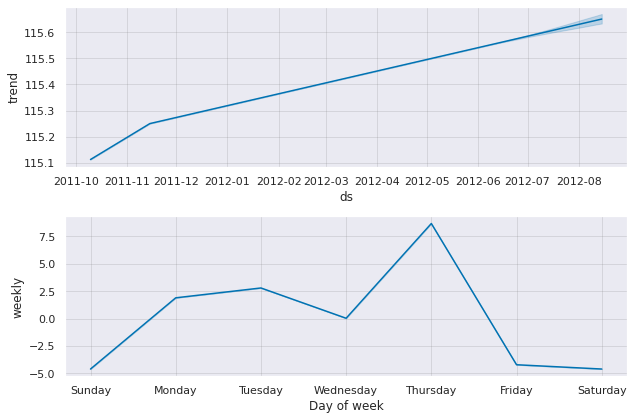

ds       trend  ...  multiplicative_terms_upper        yhat
0   2011-10-10  115.112076  ...                         0.0  117.010283
1   2011-10-11  115.115905  ...                         0.0  117.913395
2   2011-10-12  115.119734  ...                         0.0  115.153491
3   2011-10-13  115.123562  ...                         0.0  123.803675
4   2011-10-14  115.127391  ...                         0.0  110.918050
..         ...         ...  ...                         ...         ...
232 2012-08-11  115.644922  ...                         0.0  111.044809
233 2012-08-12  115.646385  ...                         0.0  111.046272
234 2012-08-13  115.647848  ...                         0.0  117.546055
235 2012-08-14  115.649311  ...                         0.0  118.446801
236 2012-08-15  115.650774  ...                         0.0  115.684532

[237 rows x 16 columns]

In [107]:
# Loading the library
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

# Fitting the model
model = Prophet(daily_seasonality=False) 
model.fit(train) #fit the  model.

# Predict
future = model.make_future_dataframe(periods=72) # predicting for ~ 2 years
forecast = model.predict(future) # Predict future

# Plot results
fig1 = model.plot(forecast) # Plot the fit to past data and future forcast.
fig2 = model.plot_components(forecast) # Plot breakdown of components.
plt.show()
forecast # Displaying various results in table format.

In [108]:
final["prophet_NoOut"] = forecast["yhat"]
final

Actual  Linear-Outl         Ols  ...  LinearR-NoOult  prophet_Out  prophet_NoOut
0      118        125.0  124.693764  ...           115.0   111.675448     117.010283
1      112        115.0  115.041645  ...           106.0   115.593087     117.913395
2      107        105.0  105.436309  ...           130.0   112.494633     115.153491
3      131        130.0  130.463407  ...           117.0   121.633185     123.803675
4      123        116.0  116.370853  ...           133.0    99.616053     110.918050
..     ...          ...         ...  ...             ...          ...            ...
67     103        100.0  100.350045  ...           118.0   123.707073     115.377287
68     118        118.0  117.721755  ...           105.0   101.690216     124.025106
69     108        105.0  105.363645  ...           120.0   113.909736     111.137115
70     121        120.0  120.212880  ...           112.0   117.827663     117.249052
71     114        112.0  112.373320  ...           109.0   114.729498     118.149798

[72 rows x 7 columns]

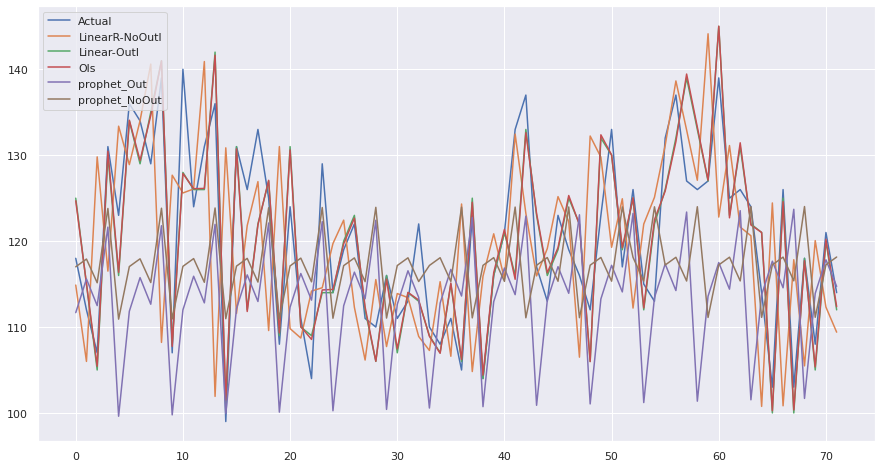

In [109]:
plt.figure(figsize=[15,8])
plt.grid(True)
plt.plot(final['Actual'],label='Actual')
plt.plot(final['LinearR-NoOutl'],label='LinearR-NoOutl')
plt.plot(final['Linear-Outl'],label='Linear-Outl')
plt.plot(final["Ols"], label="Ols")
plt.plot(final["prophet_Out"], label="prophet_Out")
plt.plot(final["prophet_NoOut"], label="prophet_NoOut")
# plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)

# Arima Model

In [110]:
df = pcu_data.copy()
df_ts = df[["Actual"]]
# temp = df_ts.set_index("SurgDate")
# temp.plot(figsize=(12,8))
# plt.legend()
# plt.grid()
# plt.show()

In [111]:
# df_ts = df_ts.values

In [112]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# normalize the dataset
# scaler = MinMaxScaler(feature_range=(0, 1))
# df_ts = scaler.fit_transform(df_ts)
train, test = train_test_split(df_ts, train_size=169)

In [113]:
print(train)
print(test)

     Actual
0       106
1       121
2       126
3       114
4       106
..      ...
164     135
165     129
166     120
167     117
168     118

[169 rows x 1 columns]
     Actual
169     112
170     107
171     131
172     123
173     136
..      ...
236     118
237     108
238     121
239     114
240     102

[72 rows x 1 columns]


In [114]:
test.shape[0]

72

In [115]:
# Fit the model automatically
arima = pm.auto_arima(train, seasonal=True, m=12, trace=True)# make the forecasts
forecasts = arima.predict(test.shape[0])  # predict N steps into the future

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.94 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1490.426, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1482.686, Time=0.64 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1483.557, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2089.734, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1480.768, Time=0.07 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1482.559, Time=0.14 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1484.627, Time=1.22 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1482.688, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1482.724, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1481.905, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1484.687, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=1559.112, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 5.058 seconds


In [116]:
# forecasts = scaler.inverse_transform(forecasts.reshape(-1,1))

In [117]:
forecasts

array([115.62831284, 115.01597526, 114.85787797, 114.81705939,
       114.80652058, 114.8037996 , 114.80309708, 114.8029157 ,
       114.80286887, 114.80285678, 114.80285366, 114.80285285,
       114.80285264, 114.80285259, 114.80285258, 114.80285257,
       114.80285257, 114.80285257, 114.80285257, 114.80285257,
       114.80285257, 114.80285257, 114.80285257, 114.80285257,
       114.80285257, 114.80285257, 114.80285257, 114.80285257,
       114.80285257, 114.80285257, 114.80285257, 114.80285257,
       114.80285257, 114.80285257, 114.80285257, 114.80285257,
       114.80285257, 114.80285257, 114.80285257, 114.80285257,
       114.80285257, 114.80285257, 114.80285257, 114.80285257,
       114.80285257, 114.80285257, 114.80285257, 114.80285257,
       114.80285257, 114.80285257, 114.80285257, 114.80285257,
       114.80285257, 114.80285257, 114.80285257, 114.80285257,
       114.80285257, 114.80285257, 114.80285257, 114.80285257,
       114.80285257, 114.80285257, 114.80285257, 114.80

In [118]:
final["Arima"] = forecasts

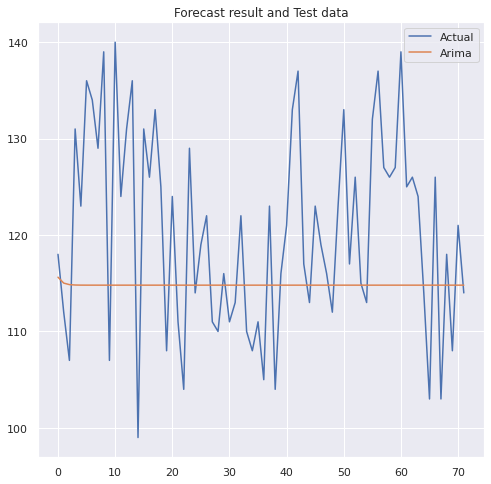

In [119]:
plt.figure(figsize  = (8,8))
plt.title('Forecast result and Test data')
# Visualize the forecasts (blue=train, green=forecasts)
plt.plot(final['Actual'],label='Actual')
plt.plot(final['Arima'],label='Arima')
plt.legend()
plt.show()

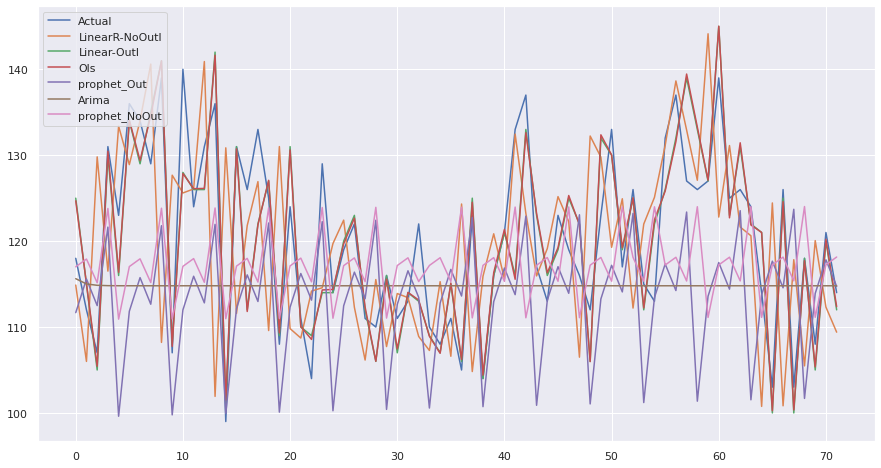

In [120]:
plt.figure(figsize=[15,8])
plt.grid(True)
plt.plot(final['Actual'],label='Actual')
plt.plot(final['LinearR-NoOutl'],label='LinearR-NoOutl')
plt.plot(final['Linear-Outl'],label='Linear-Outl')
plt.plot(final["Ols"], label="Ols")
plt.plot(final["prophet_Out"], label="prophet_Out")
plt.plot(final['Arima'],label='Arima')
plt.plot(final["prophet_NoOut"], label="prophet_NoOut")
# plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)

In [121]:
print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  169
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -737.384
Date:                Mon, 25 Oct 2021   AIC                           1480.768
Time:                        13:50:26   BIC                           1490.158
Sample:                             0   HQIC                          1484.579
                                - 169                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     85.1623      4.523     18.830      0.000      76.298      94.027
ar.L1          0.2582      0.040      6.402      0.000       0.179       0.337
sigma2       360.7358     20.958     17.212      0.0

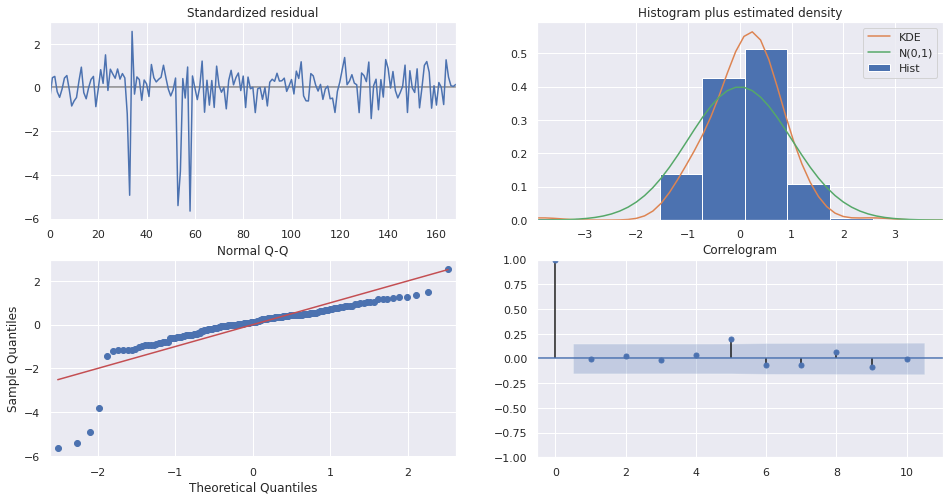

In [122]:
fig = arima.plot_diagnostics(figsize=(16,8))

# USING LSTM with LookBack using Actual

In [125]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [126]:
dataset = pcu_data.copy()
# dataset = dataset.drop(["DOW","SurgDate"], axis=1)
dataset = dataset["Actual"]
dataset = dataset.values
dataset = dataset.astype('float32')
# dataset["SurgDate"] = pd.to_datetime(dataset["SurgDate"])
# print(dataset.info())
print(dataset)

[106. 121. 126. 114. 106. 111. 122. 127. 116.  99.  99. 102. 117. 133.
 115. 105. 112. 121. 126. 101. 110. 129. 122. 145. 120. 132. 131. 127.
 134. 127. 130. 127.  95.  16. 138. 115. 124. 124. 106. 119. 119. 108.
 133. 128. 123. 124. 126. 137. 129. 117. 108. 111. 122.  14.  16.  97.
 101. 129.  11.  98. 110. 103. 112. 137.  99. 117. 100. 117.  98. 129.
 120. 112. 114.  96. 116. 130. 121. 125. 130. 116. 125. 100. 120. 115.
 115.  93. 108. 113. 104. 112.  98. 115. 122. 122. 129. 124. 123. 125.
 114. 116. 122. 111. 128. 126. 140. 114. 103. 100. 123. 127. 120. 113.
 117. 105. 111. 115. 105. 103.  90. 105. 117. 131. 145. 125. 123. 128.
 122. 119.  94. 122. 127. 123. 139.  94. 111. 121.  97. 117. 107. 137.
 137. 120. 130. 116. 106. 108. 114. 134.  98. 125. 117. 111. 130. 101.
 111. 133. 142. 135. 102. 113.  99. 115. 115. 100. 135. 129. 120. 117.
 118. 112. 107. 131. 123. 136. 134. 129. 139. 107. 140. 124. 131. 136.
  99. 131. 126. 133. 125. 108. 124. 111. 104. 129. 114. 119. 122. 111.
 110. 

In [127]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1,1))

In [128]:
# split into train and test sets
train_size = 167
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

167 74


In [129]:
# # convert an array of values into a dataset matrix
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [130]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [131]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [132]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
165/165 - 2s - loss: 0.5926
Epoch 2/100
165/165 - 0s - loss: 0.2787
Epoch 3/100
165/165 - 0s - loss: 0.0765
Epoch 4/100
165/165 - 0s - loss: 0.0236
Epoch 5/100
165/165 - 0s - loss: 0.0214
Epoch 6/100
165/165 - 0s - loss: 0.0213
Epoch 7/100
165/165 - 0s - loss: 0.0214
Epoch 8/100
165/165 - 0s - loss: 0.0212
Epoch 9/100
165/165 - 0s - loss: 0.0212
Epoch 10/100
165/165 - 0s - loss: 0.0213
Epoch 11/100
165/165 - 0s - loss: 0.0212
Epoch 12/100
165/165 - 0s - loss: 0.0212
Epoch 13/100
165/165 - 0s - loss: 0.0213
Epoch 14/100
165/165 - 0s - loss: 0.0212
Epoch 15/100
165/165 - 0s - loss: 0.0213
Epoch 16/100
165/165 - 0s - loss: 0.0214
Epoch 17/100
165/165 - 0s - loss: 0.0212
Epoch 18/100
165/165 - 0s - loss: 0.0210
Epoch 19/100
165/165 - 0s - loss: 0.0213
Epoch 20/100
165/165 - 0s - loss: 0.0212
Epoch 21/100
165/165 - 0s - loss: 0.0214
Epoch 22/100
165/165 - 0s - loss: 0.0212
Epoch 23/100
165/165 - 0s - loss: 0.0211
Epoch 24/100
165/165 - 0s - loss: 0.0210
Epoch 25/100
165/165 - 0s

In [133]:

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 19.23 RMSE
Test Score: 11.39 RMSE


In [134]:
len(testPredict)

72

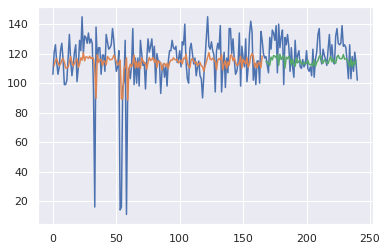

In [135]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [136]:
final["LSTM-1"] = testPredict
final

Actual  Linear-Outl         Ols  ...  prophet_NoOut       Arima      LSTM-1
0      118        125.0  124.693764  ...     117.010283  115.628313  114.432838
1      112        115.0  115.041645  ...     117.913395  115.015975  114.662407
2      107        105.0  105.436309  ...     115.153491  114.857878  113.278221
3      131        130.0  130.463407  ...     123.803675  114.817059  112.112541
4      123        116.0  116.370853  ...     110.918050  114.806521  117.604370
..     ...          ...         ...  ...            ...         ...         ...
67     103        100.0  100.350045  ...     115.377287  114.802853  116.482277
68     118        118.0  117.721755  ...     124.025106  114.802853  111.172264
69     108        105.0  105.363645  ...     111.137115  114.802853  114.662407
70     121        120.0  120.212880  ...     117.249052  114.802853  112.346542
71     114        112.0  112.373320  ...     118.149798  114.802853  115.348358

[72 rows x 9 columns]

# USING LSTM with LookBack using Hospital Lookback prediction

reference: https://machinelearningmastery.com/multi-step-time-series-forecasting-long-short-term-memory-networks-python/

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [137]:
dataset = pcu_data.copy()
dataset = dataset.drop(["DOW","SurgDate"], axis=1)
dataset = dataset.values
dataset = dataset.astype('float32')
print(dataset)

[[ 38.  45.  60. ... 100. 104. 106.]
 [ 35.  47.  65. ...  99. 114. 121.]
 [ 26.  43.  54. ... 106. 114. 126.]
 ...
 [ 39.  49.  69. ... 104. 115. 121.]
 [ 34.  51.  68. ... 101. 106. 114.]
 [ 27.  41.  63. ...  86. 101. 102.]]


In [138]:
n_test = 72
train, test = dataset[0:-n_test], dataset[-n_test:]

print(test)
print('Train: %s, Test: %s' % (train.shape, test.shape))

[[ 36.  52.  66. ... 100. 107. 112.]
 [ 28.  42.  56. ...  93. 101. 107.]
 [ 44.  55.  86. ... 119. 123. 131.]
 ...
 [ 39.  49.  69. ... 104. 115. 121.]
 [ 34.  51.  68. ... 101. 106. 114.]
 [ 27.  41.  63. ...  86. 101. 102.]]
Train: (169, 17), Test: (72, 17)


In [139]:
trainX = train[:, :-1]
trainY = train[:,-1:]
testX = test[:, :-1]
testY = test[:,-1:]
print(f"trainX:{trainX.shape}, trainY:{trainY.shape},testX:{testX.shape},testY{testY.shape}")

trainX:(169, 16), trainY:(169, 1),testX:(72, 16),testY(72, 1)


In [140]:
print(trainX.shape)
print(testX.shape)

(169, 16)
(72, 16)


In [141]:
# # reshape into X=t and Y=t+1
# look_back = 16
# # trainX, trainY = create_dataset(train, look_back)
# # testX, testY = create_dataset(test, look_back)
# # reshape input to be [samples, time steps, features]
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# print(trainX.shape, testX.shape)

In [142]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = trainX.reshape((trainX.shape[0], trainX.shape[1], 1))
print(X.shape)
y = trainY.reshape((trainY.shape[0], trainY.shape[1], 1))
print(y.shape)

(169, 16, 1)
(169, 1, 1)


In [147]:
# define model
# of days prior (lookback)
n_steps_in = 16
n_steps_out = 1
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [148]:
history = model.fit(X, y, epochs=50, verbose=0)

In [149]:
# demonstrate prediction
x_input = testX
x_input = x_input.reshape((testX.shape[0], n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)

In [151]:
# make predictions
# trainx = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))
testX = testX.reshape((testX.shape[0], testX.shape[1], n_features))
trainPredict = model.predict(X)
testPredict = model.predict(testX)
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

In [154]:
# report performance
rmse = math.sqrt(mean_squared_error(testY, testPredict))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 5.754


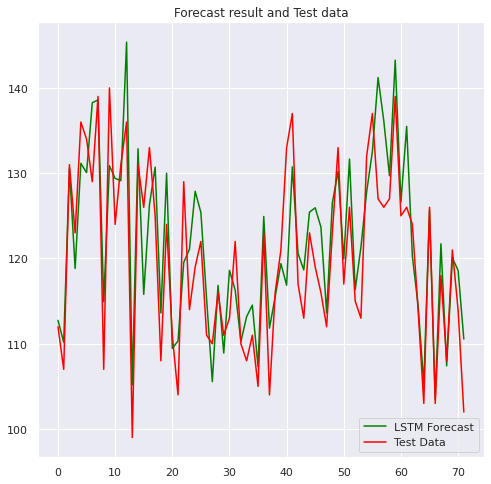

In [155]:
plt.figure(figsize  = (8,8))
plt.title('Forecast result and Test data')
# Visualize the forecasts (blue=train, green=forecasts)
# plt.plot(train, c='blue')
plt.plot(testPredict, c='green', label = 'LSTM Forecast')
plt.plot(testY, c='red', label = 'Test Data')
plt.legend()
plt.show()

In [156]:
final["LSTM-16"] = testPredict
final

Actual  Linear-Outl         Ols  ...       Arima      LSTM-1     LSTM-16
0      118        125.0  124.693764  ...  115.628313  114.432838  112.742210
1      112        115.0  115.041645  ...  115.015975  114.662407  110.172478
2      107        105.0  105.436309  ...  114.857878  113.278221  130.542068
3      131        130.0  130.463407  ...  114.817059  112.112541  118.825378
4      123        116.0  116.370853  ...  114.806521  117.604370  131.159470
..     ...          ...         ...  ...         ...         ...         ...
67     103        100.0  100.350045  ...  114.802853  116.482277  121.720131
68     118        118.0  117.721755  ...  114.802853  111.172264  107.401711
69     108        105.0  105.363645  ...  114.802853  114.662407  120.042984
70     121        120.0  120.212880  ...  114.802853  112.346542  118.605568
71     114        112.0  112.373320  ...  114.802853  115.348358  110.551743

[72 rows x 10 columns]

In [157]:
final.columns

Index(['Actual', 'Linear-Outl', 'Ols', 'LinearR-NoOutl', 'LinearR-NoOult',
       'prophet_Out', 'prophet_NoOut', 'Arima', 'LSTM-1', 'LSTM-16'],
      dtype='object')

In [158]:
from sklearn.metrics import mean_squared_error
for i in set(final.columns) - {'Actual'}:
  print(f'{i} MSE: ', mean_squared_error(final[i], final["Actual"]))

LinearR-NoOult MSE:  166.40277777777777
Linear-Outl MSE:  30.84722222222222
Ols MSE:  31.199165663297055
LSTM-1 MSE:  129.761206900536
prophet_NoOut MSE:  112.96412397200965
Arima MSE:  134.5772671534984
prophet_Out MSE:  155.15573678821409
LinearR-NoOutl MSE:  167.27208157108237
LSTM-16 MSE:  155.88410108319172


In [159]:
errors = pd.DataFrame(columns=["MAE","MSE","RMSE","R-Squared"])
for i in set(final.columns) - {'Actual'}:
  y = final['Actual']
  yhat = final[f'{i}']
  d = y - yhat
  mse_f = np.mean(d**2)
  mae_f = np.mean(abs(d))
  rmse_f = np.sqrt(mse_f)
  r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))
  errors.loc[f"{i}"] = [mae_f, mse_f,rmse_f,r2_f]
  print(f"Results by manual calculation:{i}")
  print(f"{i} MAE:",mae_f)
  print(f"{i} MSE:", mse_f)
  print(f"{i} RMSE:", rmse_f)
  print(f"{i} R-Squared:", r2_f)
errors

Results by manual calculation:LinearR-NoOult
LinearR-NoOult MAE: 10.291666666666666
LinearR-NoOult MSE: 166.40277777777777
LinearR-NoOult RMSE: 12.899720065868785
LinearR-NoOult R-Squared: -0.5901636926706972
Results by manual calculation:Linear-Outl
Linear-Outl MAE: 4.069444444444445
Linear-Outl MSE: 30.84722222222222
Linear-Outl RMSE: 5.554027567650544
Linear-Outl R-Squared: 0.705220468957381
Results by manual calculation:Ols
Ols MAE: 4.09493115615955
Ols MSE: 31.19916566329705
Ols RMSE: 5.585621331892903
Ols R-Squared: 0.701857257781795
Results by manual calculation:LSTM-1
LSTM-1 MAE: 9.339713838365343
LSTM-1 MSE: 129.761206900536
LSTM-1 RMSE: 11.391277667607616
LSTM-1 R-Squared: -0.24001271304449667
Results by manual calculation:prophet_NoOut
prophet_NoOut MAE: 8.848963954036606
prophet_NoOut MSE: 112.96412397200965
prophet_NoOut RMSE: 10.62845821236597
prophet_NoOut R-Squared: -0.07949789608999014
Results by manual calculation:Arima
Arima MAE: 9.496677614033482
Arima MSE: 134.5772

MAE         MSE       RMSE  R-Squared
LinearR-NoOult  10.291667  166.402778  12.899720  -0.590164
Linear-Outl      4.069444   30.847222   5.554028   0.705220
Ols              4.094931   31.199166   5.585621   0.701857
LSTM-1           9.339714  129.761207  11.391278  -0.240013
prophet_NoOut    8.848964  112.964124  10.628458  -0.079498
Arima            9.496678  134.577267  11.600744  -0.286036
prophet_Out     10.214953  155.155737  12.456153  -0.482686
LinearR-NoOutl  10.329812  167.272082  12.933371  -0.598471
LSTM-16         10.168044  155.884101  12.485355  -0.489646

In [189]:
for i in errors.columns:
  print(errors[[i]].abs().idxmin())

MAE    Linear-Outl
dtype: object
MSE    Linear-Outl
dtype: object
RMSE    Linear-Outl
dtype: object
R-Squared    prophet_NoOut
dtype: object


In [184]:
params = {
    "legend.fontsize": "medium",
    "figure.figsize": (30, 10),
    "axes.labelsize": "large",
    "axes.titlesize": "large",
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
}
plt.rcParams.update(params)

In [188]:
plt.figure(figsize=[30,16])
plt.grid(True)
plt.plot(final['Actual'],label='Actual')
plt.plot(final['LinearR-NoOutl'],label='LinearR-NoOutl')
plt.plot(final['Linear-Outl'],label='Linear-Outl')
plt.plot(final["Ols"], label="Ols")
plt.plot(final["prophet_Out"], label="prophet_Out")
plt.plot(final['Arima'],label='Arima')
plt.plot(final["prophet_NoOut"], label="prophet_NoOut")
plt.plot(final["LSTM-1"], label="LSTM-1")
plt.plot(final["LSTM-16"], label="LSTM-16")
# plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)
# plt.show()
plt.savefig('all_models_achieved.svg', format='svg', dpi=1200)
plt.close()

In [187]:

for i in final.columns:
  plt.figure(figsize=[30,16])
  plt.grid(True)
  plt.plot(final['Actual'],label='Actual')
  plt.plot(final[i],label=i)
  plt.legend(loc=2)
  # plt.show()
  plt.savefig(f'{i}.svg', format='svg', dpi=1200)
  plt.close()

# How many days Prior

In [ ]:
from sklearn.linear_model import LinearRegression

In [191]:
reg = pcu_data.copy().drop(["SurgDate","DOW"], axis=1)
reg

T - 28  T - 21  T - 14  T - 13  T - 12  ...  T - 4  T - 3  T - 2  T - 1  Actual
0        38      45      60      63      65  ...     94     98    100    104     106
1        35      47      65      68      78  ...     99     99     99    114     121
2        26      43      54      62      72  ...    102    102    106    114     126
3        28      48      65      70      72  ...     94     97     98    103     114
4        31      40      50      50      50  ...     78     83     87     94     106
..      ...     ...     ...     ...     ...  ...    ...    ...    ...    ...     ...
236      33      49      68      71      82  ...    101    103    109    110     118
237      31      56      68      70      74  ...     97     98     98     99     108
238      39      49      69      78      81  ...     99    100    104    115     121
239      34      51      68      77      75  ...     99     97    101    106     114
240      27      41      63      63      63  ...     78     81     86    101     102

[241 rows x 17 columns]

In [196]:
 reg.iloc[:,1:-1]

T - 21  T - 14  T - 13  T - 12  T - 11  ...  T - 5  T - 4  T - 3  T - 2  T - 1
0        45      60      63      65      70  ...     89     94     98    100    104
1        47      65      68      78      82  ...     95     99     99     99    114
2        43      54      62      72      72  ...    101    102    102    106    114
3        48      65      70      72      72  ...     94     94     97     98    103
4        40      50      50      50      54  ...     73     78     83     87     94
..      ...     ...     ...     ...     ...  ...    ...    ...    ...    ...    ...
236      49      68      71      82      84  ...     97    101    103    109    110
237      56      68      70      74      78  ...     94     97     98     98     99
238      49      69      78      81      82  ...     99     99    100    104    115
239      51      68      77      75      75  ...     99     99     97    101    106
240      41      63      63      63      63  ...     77     78     81     86    101

[241 rows x 15 columns]

In [213]:
train.iloc[:, 15:-1].columns[0]

'T - 1'

In [224]:
train = reg[:int(len(reg)*0.7)]
test = reg[int(len(reg)*0.7):]
y = train.iloc[:,-1:]
testy = test.iloc[:,-1:]
res_days = testy

for i in range(0, reg.shape[1]-2):
  X = train.iloc[:,i:-1]
  testX = test.iloc[:,i:-1]
  #Fitting Simple Linear regression data model
  regressorObject=LinearRegression()
  regressorObject.fit(X,y)
  #predict number of surgeries for the data set
  y_pred_test_data=regressorObject.predict(testX)
  # pred = pd.DataFrame(y_pred_test_data, columns = [f'{X.columns[0]}'])
  res_days[f'{X.columns[0]}'] = y_pred_test_data
  print(res_days)

     Actual      T - 28
168     118  124.693764
169     112  115.041645
170     107  105.436309
171     131  130.463407
172     123  116.370853
..      ...         ...
236     118  117.721755
237     108  105.363645
238     121  120.212880
239     114  112.373320
240     102  109.289758

[73 rows x 2 columns]
     Actual      T - 28      T - 21
168     118  124.693764  124.265267
169     112  115.041645  114.777806
170     107  105.436309  105.198531
171     131  130.463407  131.138471
172     123  116.370853  116.318496
..      ...         ...         ...
236     118  117.721755  117.404477
237     108  105.363645  104.070176
238     121  120.212880  120.622547
239     114  112.373320  112.096288
240     102  109.289758  109.070014

[73 rows x 3 columns]
     Actual      T - 28      T - 21      T - 14
168     118  124.693764  124.265267  124.392618
169     112  115.041645  114.777806  114.704681
170     107  105.436309  105.198531  105.158100
171     131  130.463407  131.138471  131.4

In [227]:
errors = pd.DataFrame(columns=["MAE","MSE","RMSE","R-Squared"])
for i in set(res_days.columns) - {'Actual'}:
  y = res_days['Actual']
  yhat = res_days[f'{i}']
  d = y - yhat
  mse_f = np.mean(d**2)
  mae_f = np.mean(abs(d))
  rmse_f = np.sqrt(mse_f)
  r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))
  errors.loc[f"{i}"] = [mae_f, mse_f,rmse_f,r2_f]
  print(f"Results by manual calculation:{i}")
  print(f"{i} MAE:",mae_f)
  print(f"{i} MSE:", mse_f)
  print(f"{i} RMSE:", rmse_f)
  print(f"{i} R-Squared:", r2_f)
errors

Results by manual calculation:T - 9
T - 9 MAE: 4.0900311423294
T - 9 MSE: 30.266016102356346
T - 9 RMSE: 5.501455816632207
T - 9 R-Squared: 0.7190444340923776
Results by manual calculation:T - 2
T - 2 MAE: 3.8131232717197205
T - 2 MSE: 25.337787587360225
T - 2 RMSE: 5.033665422667683
T - 2 R-Squared: 0.7647925506158806
Results by manual calculation:T - 8
T - 8 MAE: 3.848540178592604
T - 8 MSE: 26.723325496185822
T - 8 RMSE: 5.169460851596211
T - 8 R-Squared: 0.7519307789858096
Results by manual calculation:T - 3
T - 3 MAE: 3.806554950378742
T - 3 MSE: 25.62511136203162
T - 3 RMSE: 5.062125182374654
T - 3 R-Squared: 0.7621253606745777
Results by manual calculation:T - 13
T - 13 MAE: 4.114964142202937
T - 13 MSE: 30.940093508678927
T - 13 RMSE: 5.562381999528522
T - 13 R-Squared: 0.7127870595334524
Results by manual calculation:T - 10
T - 10 MAE: 4.124100566735652
T - 10 MSE: 30.644846729880673
T - 10 RMSE: 5.535778782599669
T - 10 R-Squared: 0.7155277977111874
Results by manual calculat

MAE        MSE      RMSE  R-Squared
T - 9   4.090031  30.266016  5.501456   0.719044
T - 2   3.813123  25.337788  5.033665   0.764793
T - 8   3.848540  26.723325  5.169461   0.751931
T - 3   3.806555  25.625111  5.062125   0.762125
T - 13  4.114964  30.940094  5.562382   0.712787
T - 10  4.124101  30.644847  5.535779   0.715528
T - 28  4.138696  31.499733  5.612462   0.707592
T - 11  4.127894  30.749210  5.545197   0.714559
T - 6   3.798622  25.998697  5.098892   0.758657
T - 14  4.156117  31.277247  5.592606   0.709657
T - 7   3.852592  26.743108  5.171374   0.751747
T - 4   3.816183  25.681748  5.067716   0.761600
T - 21  4.150498  31.044546  5.571763   0.711817
T - 5   3.836267  25.761413  5.075570   0.760860
T - 12  4.115615  30.680645  5.539011   0.715195

In [228]:
for i in errors.columns:
  print(errors[[i]].abs().idxmin())

MAE    T - 6
dtype: object
MSE    T - 2
dtype: object
RMSE    T - 2
dtype: object
R-Squared    T - 28
dtype: object
